1,prepare data

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import numpy

In [27]:
Open=pd.read_csv('SP500_new.csv', usecols=[1],engine='python', skipfooter=1).values.astype('float32')
High=pd.read_csv('SP500_new.csv', usecols=[2],engine='python', skipfooter=1).values.astype('float32')
Low=pd.read_csv('SP500_new.csv', usecols=[3],engine='python', skipfooter=1).values.astype('float32')
Close=pd.read_csv('SP500_new.csv', usecols=[4],engine='python', skipfooter=1).values.astype('float32')
Adjclose=pd.read_csv('SP500_new.csv', usecols=[5],engine='python', skipfooter=1).values.astype('float32')
Vloume=pd.read_csv('SP500_new.csv', usecols=[6],engine='python', skipfooter=1).values.astype('float32')

In [28]:
def preparedata(features):
    Open=pd.read_csv('SP500_new.csv', usecols=[1],engine='python', skipfooter=1).values.astype('float32')
    High=pd.read_csv('SP500_new.csv', usecols=[2],engine='python', skipfooter=1).values.astype('float32')
    Low=pd.read_csv('SP500_new.csv', usecols=[3],engine='python', skipfooter=1).values.astype('float32')
    Close=pd.read_csv('SP500_new.csv', usecols=[4],engine='python', skipfooter=1).values.astype('float32')
    Adjclose=pd.read_csv('SP500_new.csv', usecols=[5],engine='python', skipfooter=1).values.astype('float32')
    Vloume=pd.read_csv('SP500_new.csv', usecols=[6],engine='python', skipfooter=1).values.astype('float32')
    
    lenth=len(pd.read_csv('SP500_new.csv', usecols=[1],engine='python', skipfooter=1).values.astype('float32'))
    
    dataX = []
    for i in range(lenth):
        a=[]
        for feature in features:
            a.append(feature[i, 0])
        dataX.append(a)
    dataset=numpy.array(dataX)

    dataY = []
    for i in range(1,lenth):
        a=[]
        a.append(Adjclose[i, 0])
        dataY.append(a)
    target=numpy.array(dataY)

    dataset=dataset[:-1]

    # normalize the dataset
    scaler_dataset = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler_dataset.fit_transform(dataset)

    # normalize the dataset
    scaler_target = MinMaxScaler(feature_range=(0, 1))
    target = scaler_target.fit_transform(target)

    trainX=dataset[:-500]
    testX=dataset[-500:]
    trainY=target[:-500]
    testY=target[-500:]

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    return trainX,trainY,testX,testY,scaler_dataset,scaler_target


4.2,tune combinations of feature

In [46]:
repeats=5

accuracy plot


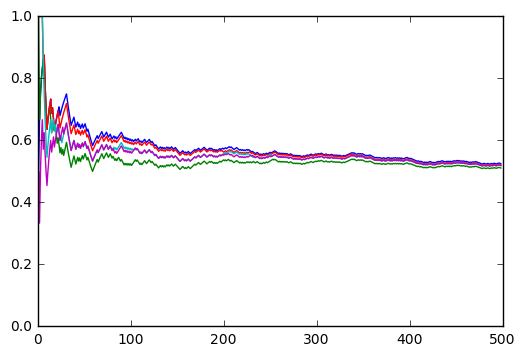

adjclose plot


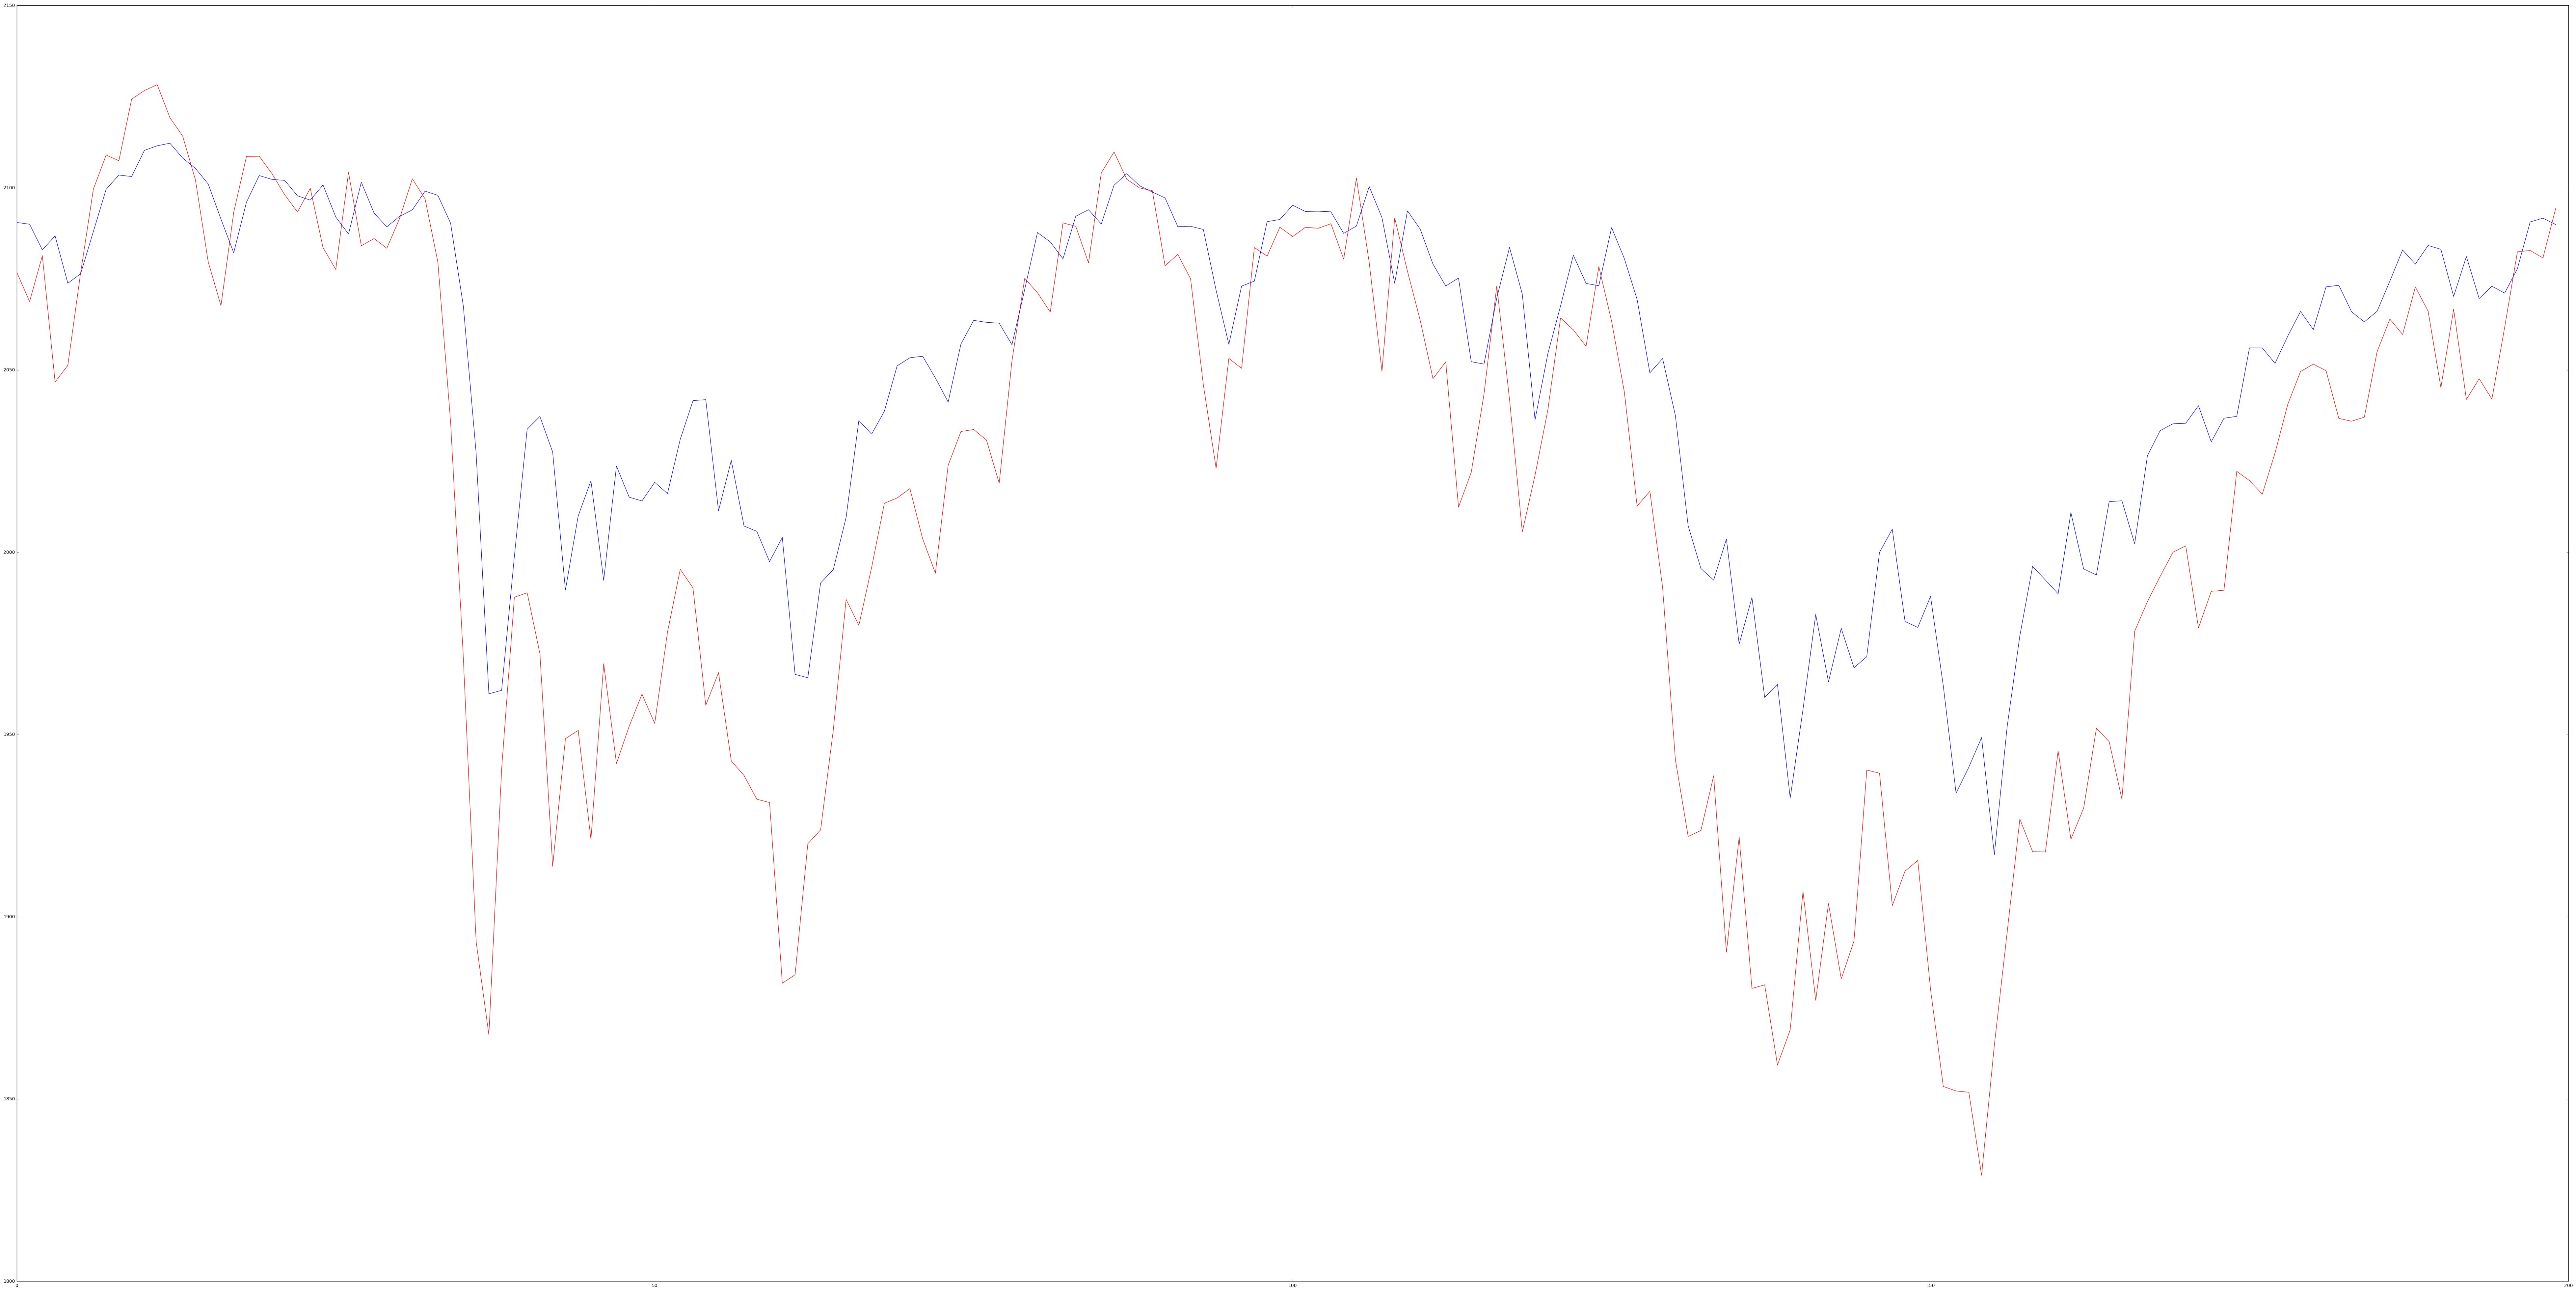

mean of train_RMSE
143.81769412
std of train_RMSE
3.90299345346
mean of test_RMSE
84.4707619149
std of test_RMSE
16.6896285709
mean of test_r2Score
0.665018503199
std of test_r2Score
0.119358803557
mean of accuracy_all
0.556907355385
std of accuracy_all
0.0140923008587
mean of accuracy_30
0.664516129032
std of accuracy_30
0.056243857336
accuracy plot


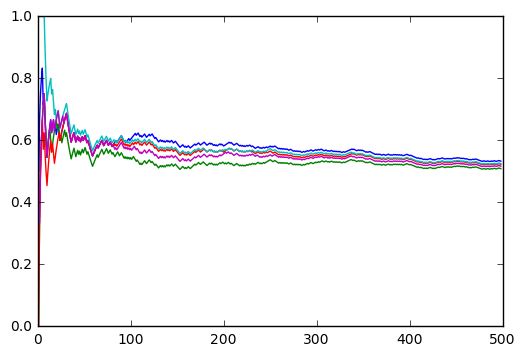

adjclose plot


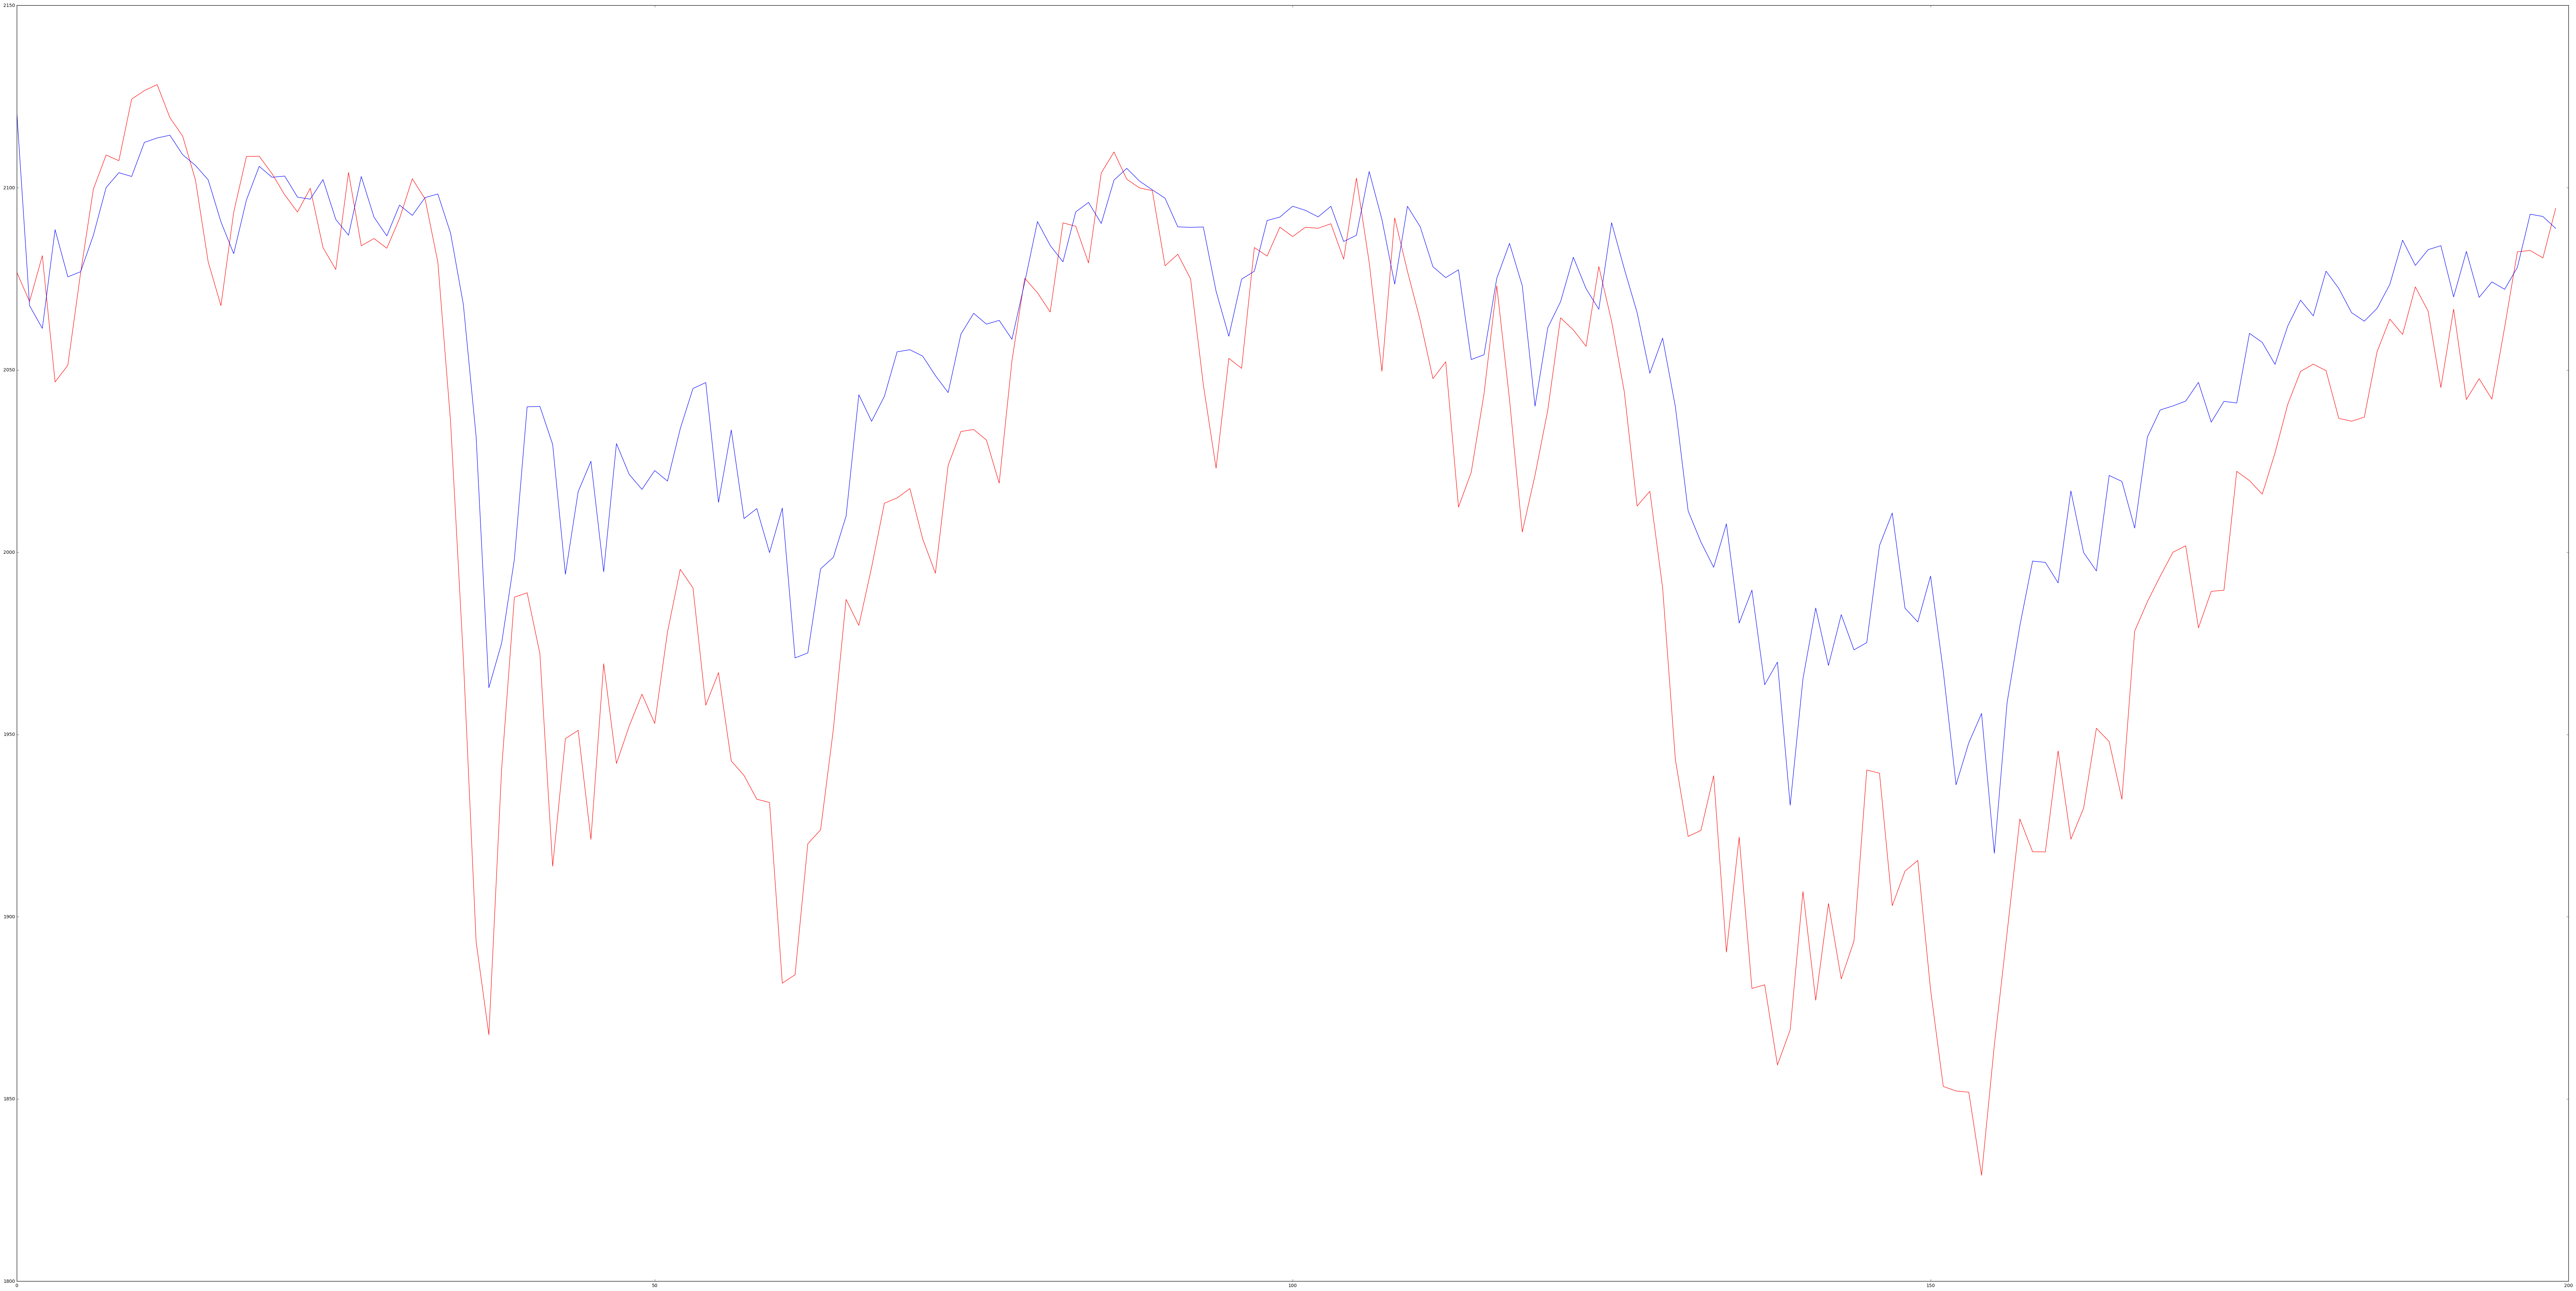

mean of train_RMSE
146.590375748
std of train_RMSE
2.97811350237
mean of test_RMSE
69.0364667631
std of test_RMSE
16.578878901
mean of test_r2Score
0.772236419575
std of test_r2Score
0.112188075974
mean of accuracy_all
0.559469453355
std of accuracy_all
0.0179034681226
mean of accuracy_30
0.670967741935
std of accuracy_30
0.0316063192617
accuracy plot


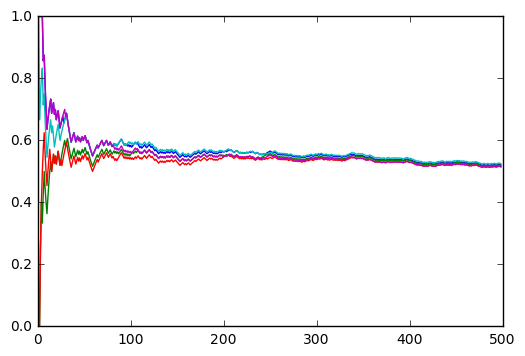

adjclose plot


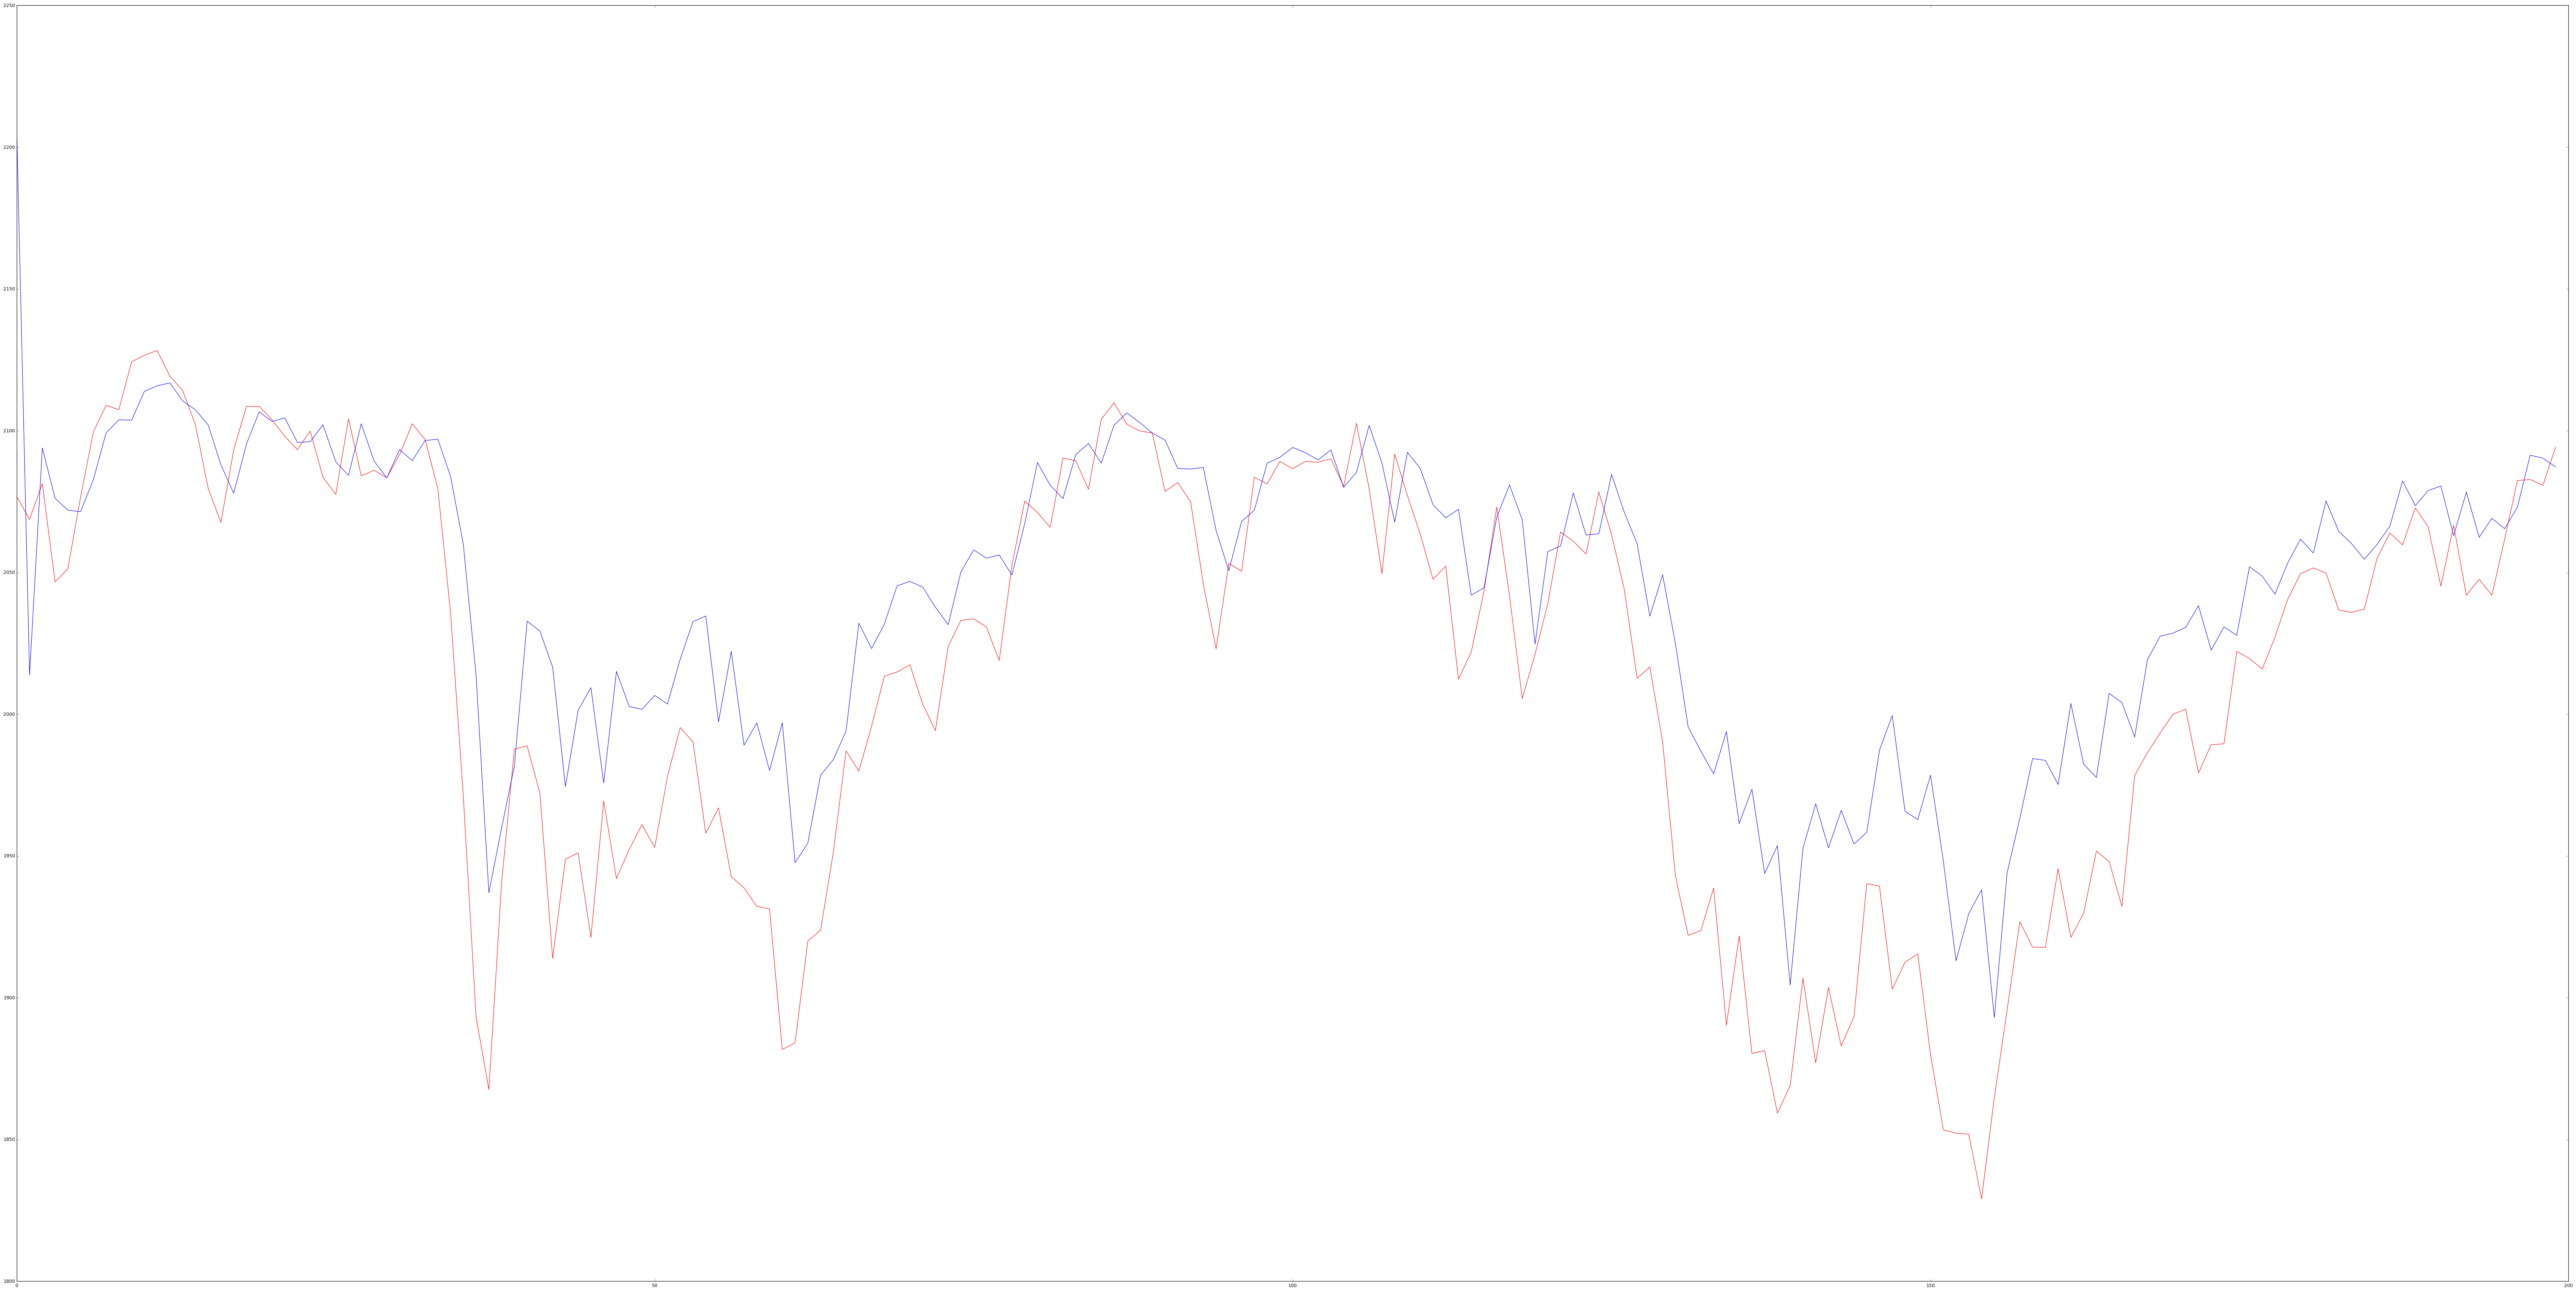

mean of train_RMSE
154.160388837
std of train_RMSE
26.585657219
mean of test_RMSE
65.2203857349
std of test_RMSE
11.7019761378
mean of test_r2Score
0.801617137211
std of test_r2Score
0.0621407350644
mean of accuracy_all
0.552126981359
std of accuracy_all
0.0153508817922
mean of accuracy_30
0.638709677419
std of accuracy_30
0.0474094788926
accuracy plot


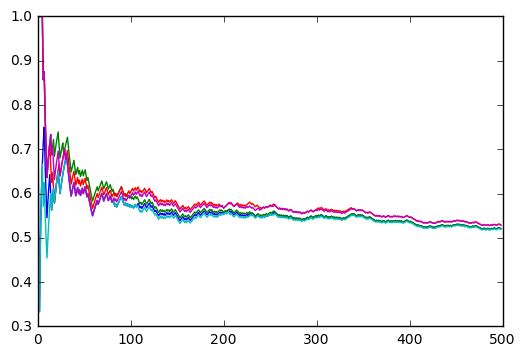

adjclose plot


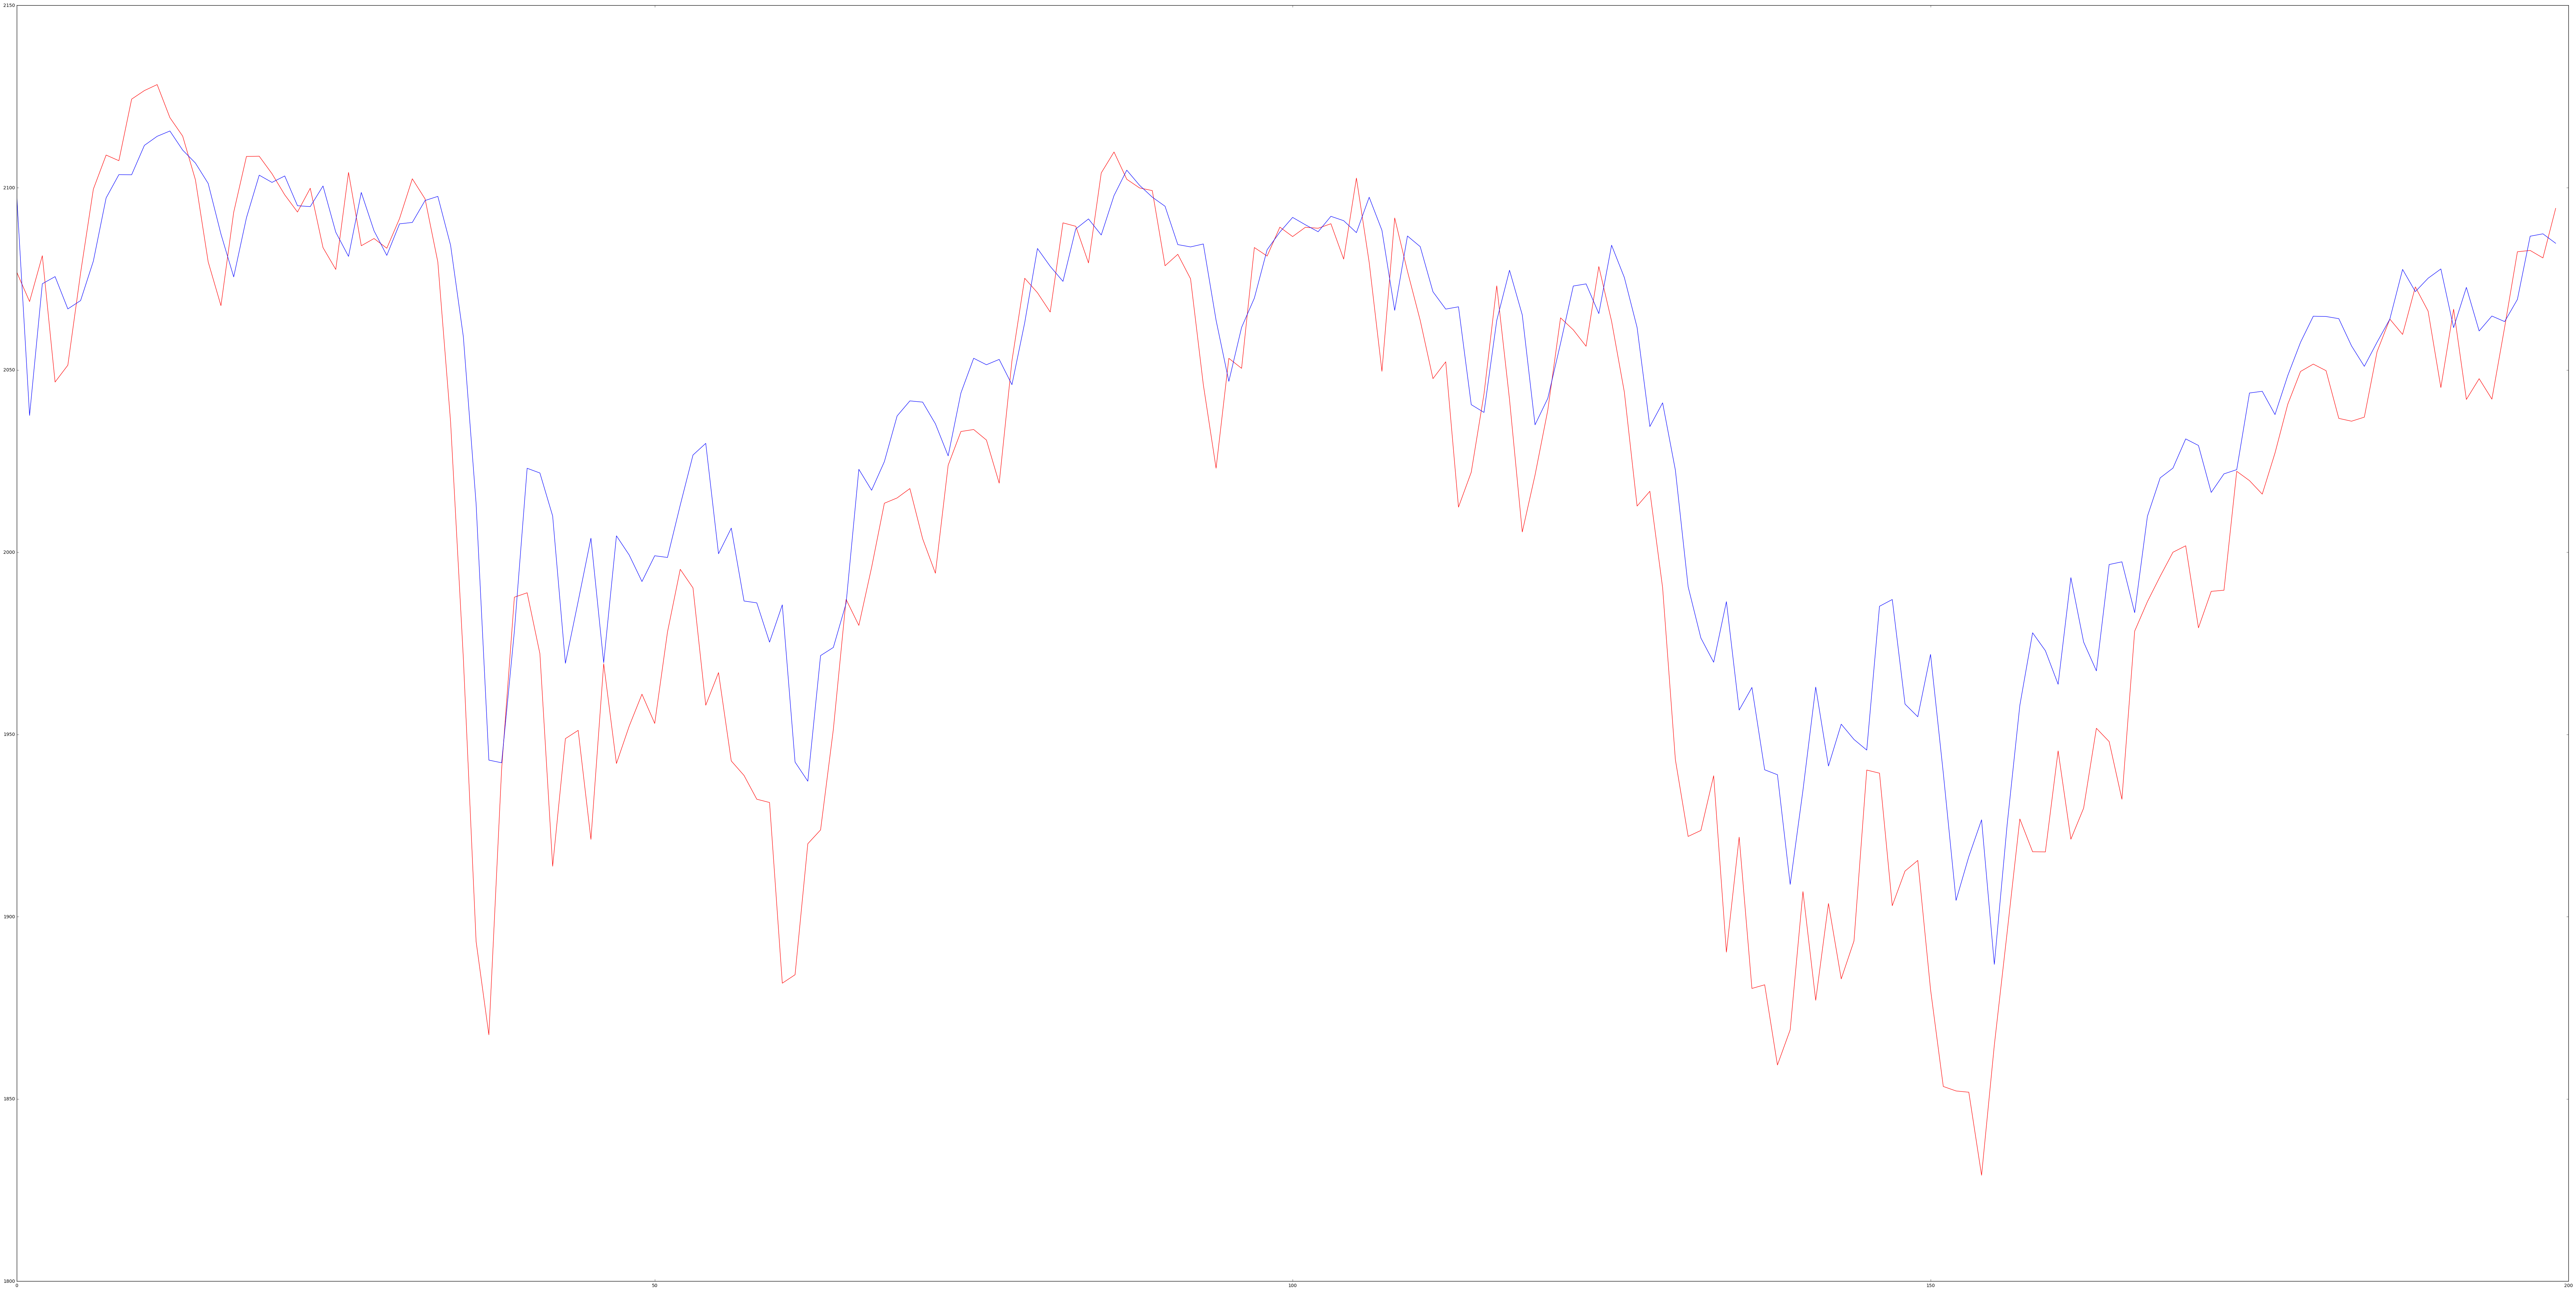

mean of train_RMSE
141.215037243
std of train_RMSE
3.78442203069
mean of test_RMSE
72.8557081193
std of test_RMSE
4.98880519257
mean of test_r2Score
0.759045205024
std of test_r2Score
0.0336497832397
mean of accuracy_all
0.566928914808
std of accuracy_all
0.0111429745579
mean of accuracy_30
0.683870967742
std of accuracy_30
0.0129032258065
accuracy plot


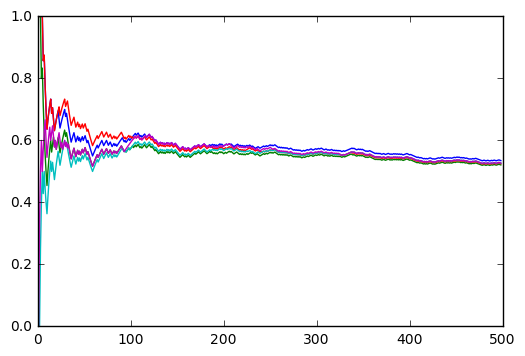

adjclose plot


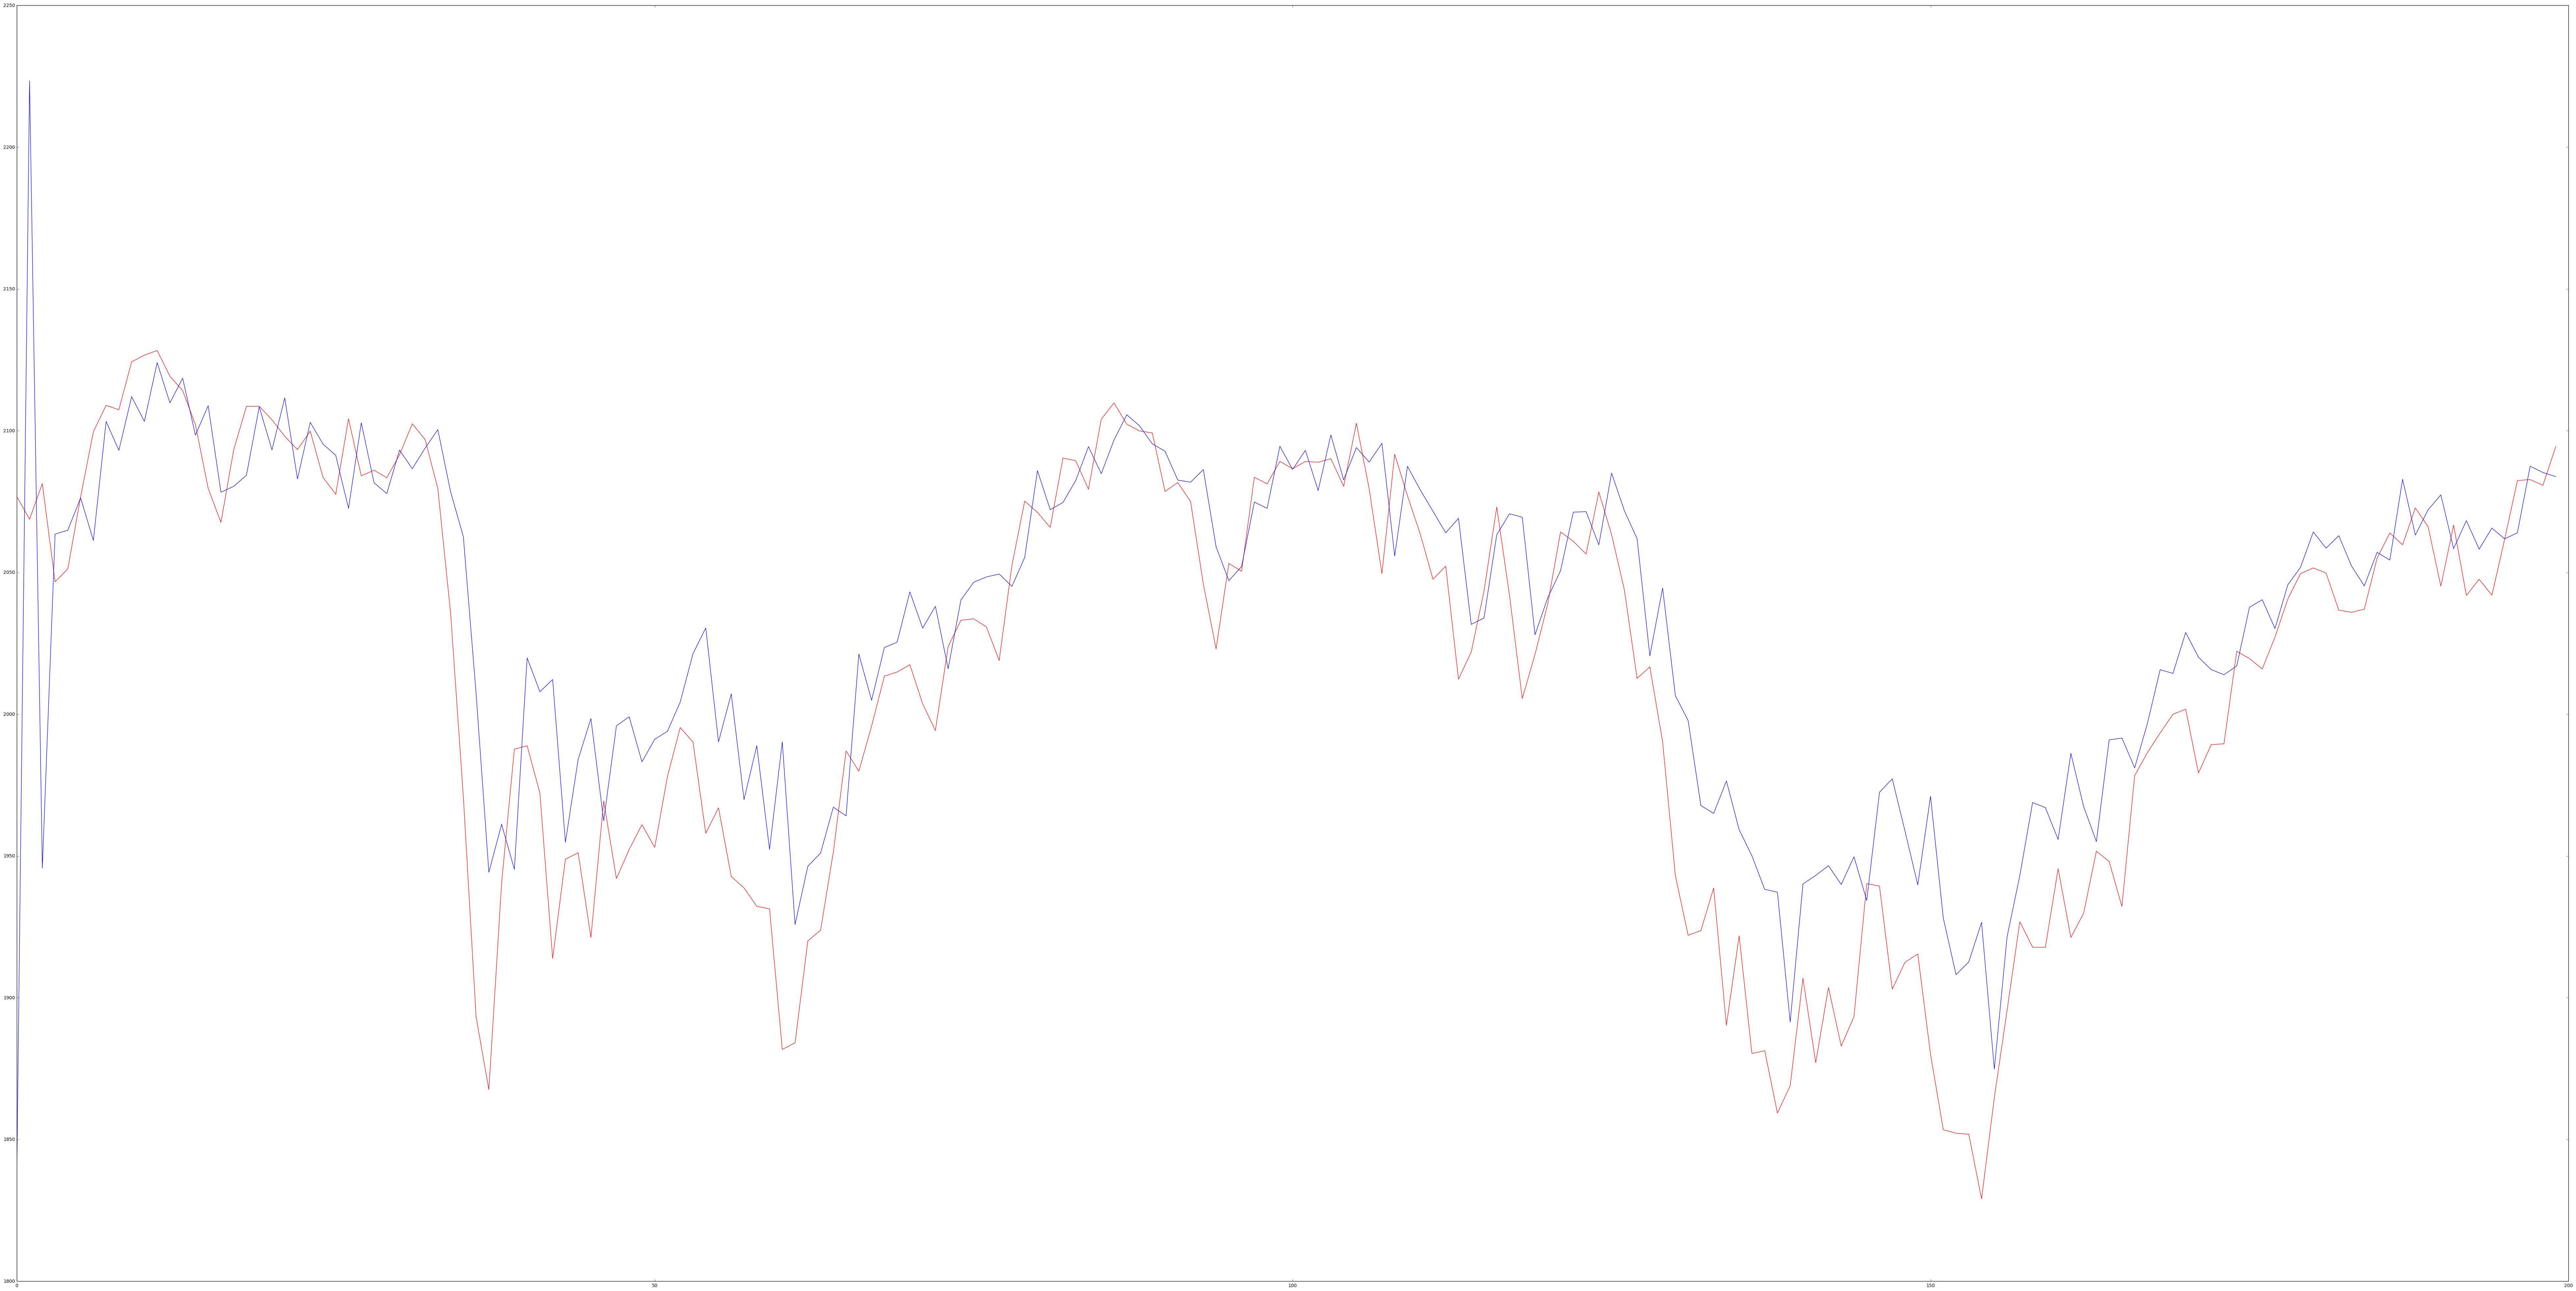

mean of train_RMSE
156.935132034
std of train_RMSE
7.79018547015
mean of test_RMSE
78.1219955824
std of test_RMSE
16.437896489
mean of test_r2Score
0.712036267288
std of test_r2Score
0.116945455338
mean of accuracy_all
0.565795059011
std of accuracy_all
0.0144333203868
mean of accuracy_30
0.632258064516
std of accuracy_30
0.0524131509977
accuracy plot


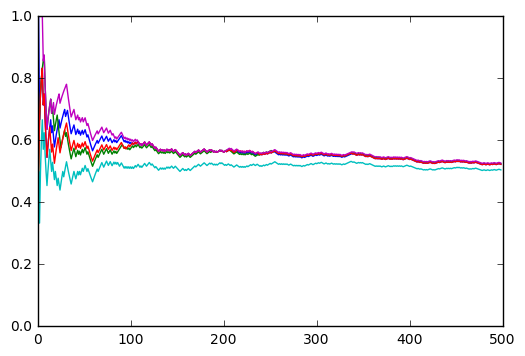

adjclose plot


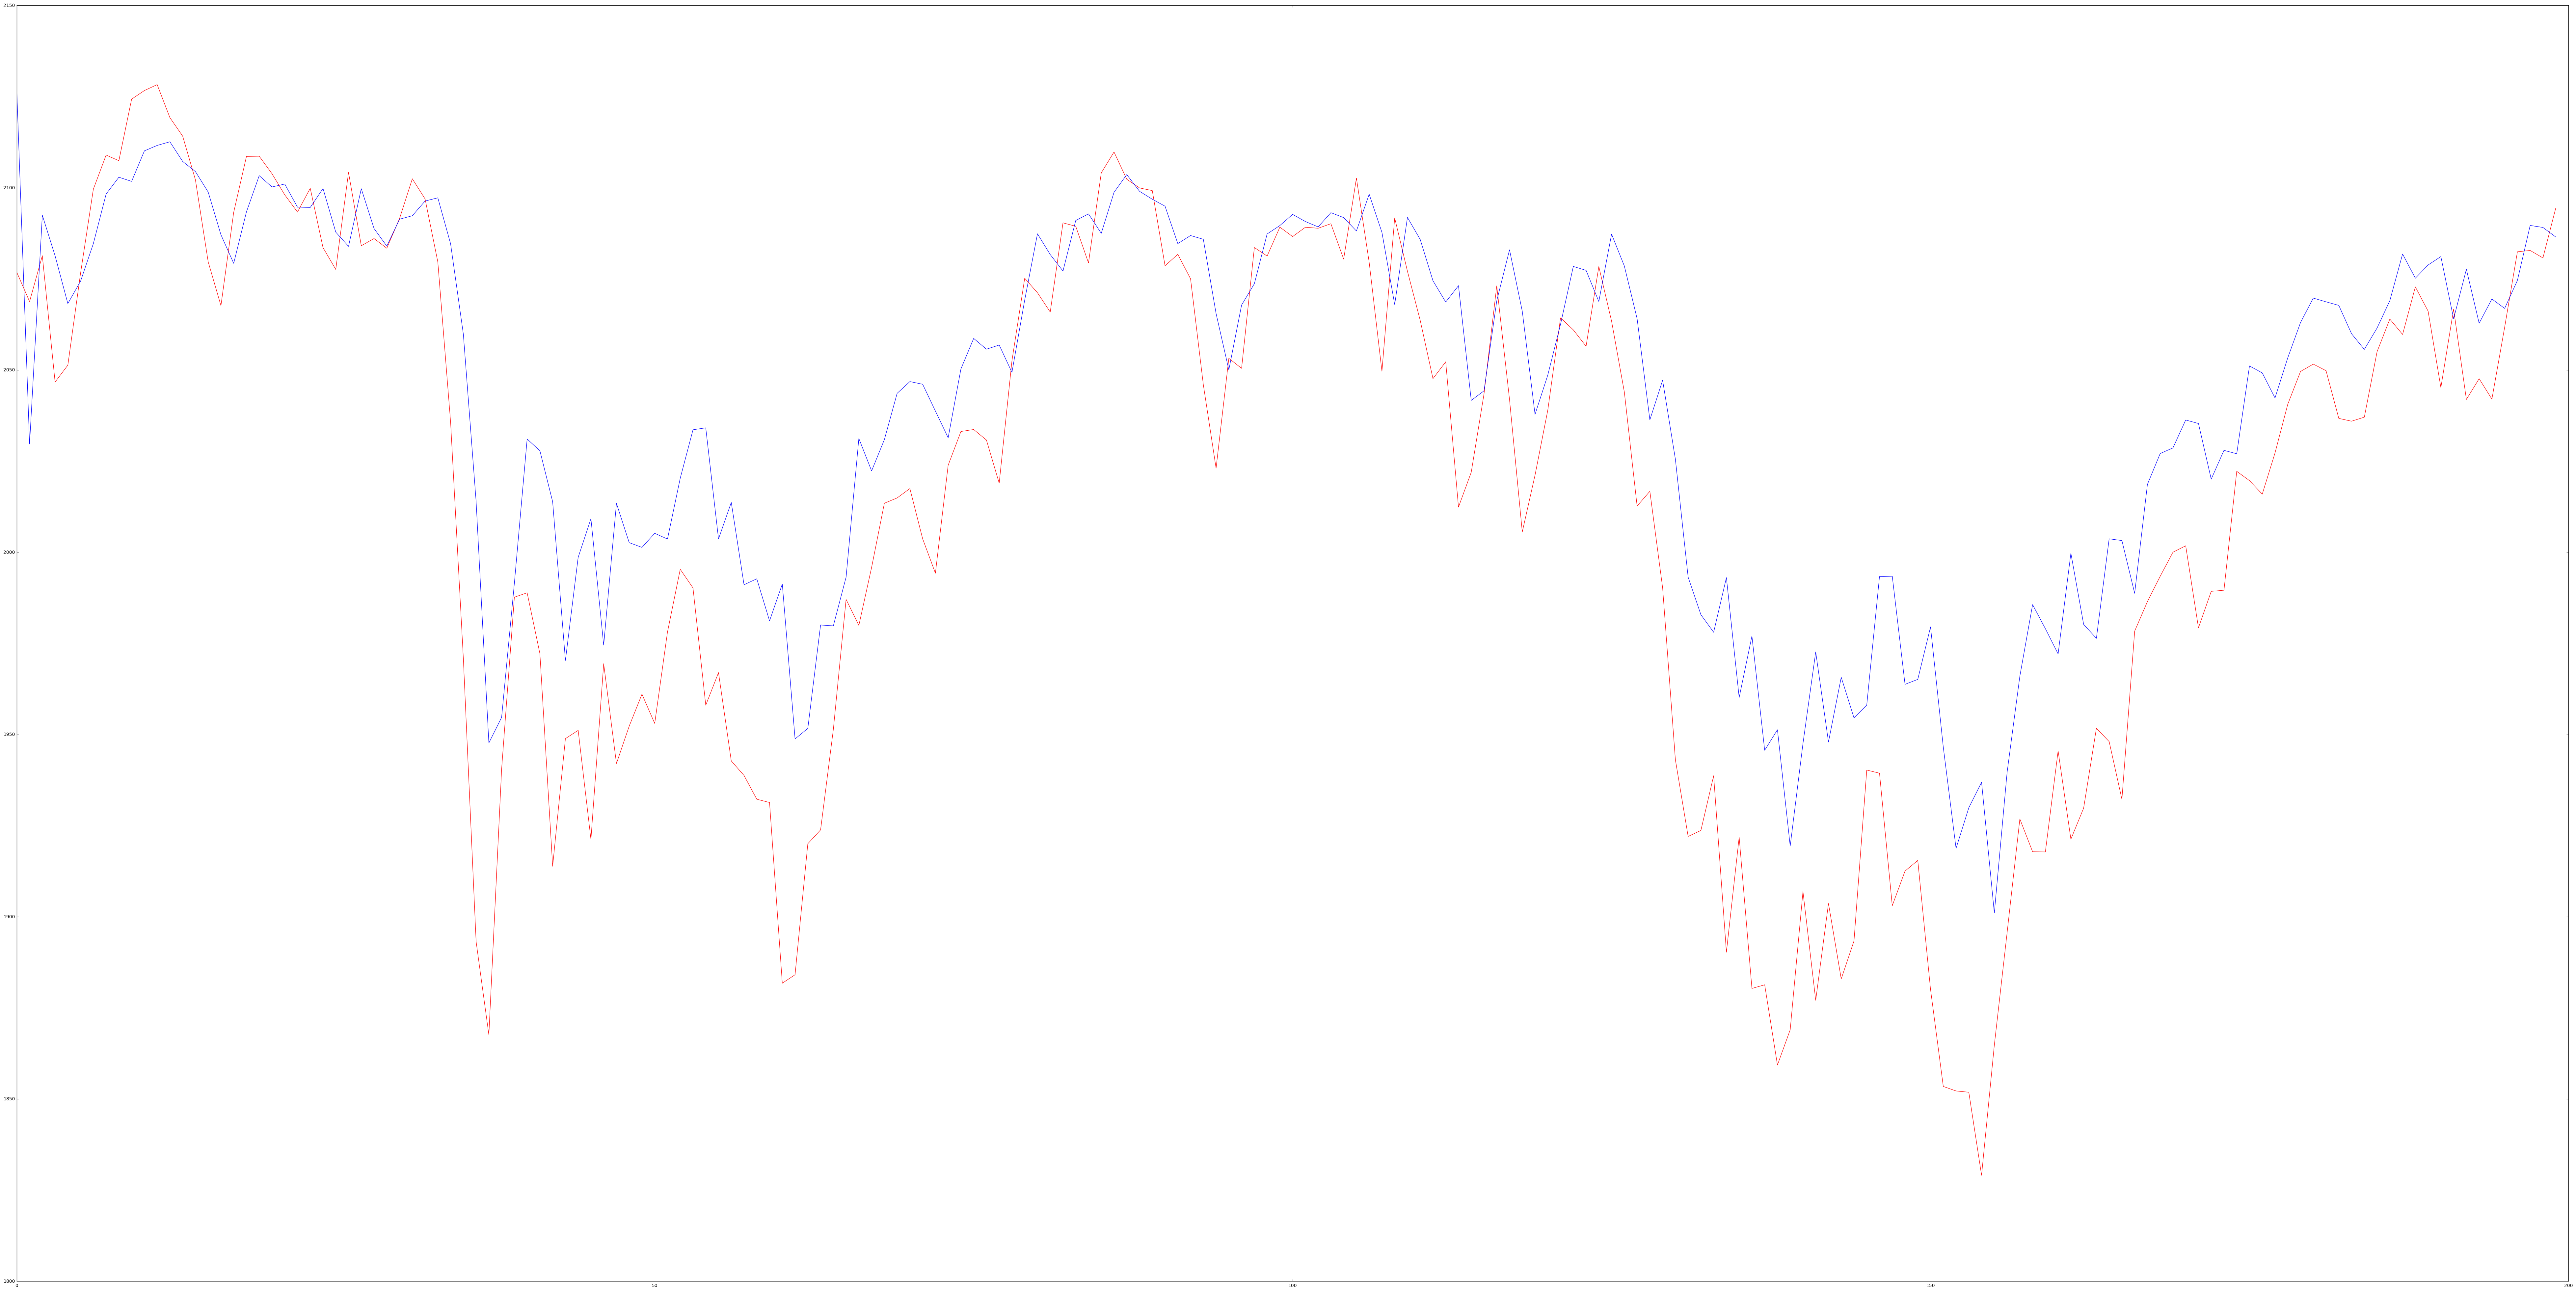

mean of train_RMSE
147.497028602
std of train_RMSE
5.57936268337
mean of test_RMSE
69.2156465608
std of test_RMSE
15.7476749487
mean of test_r2Score
0.772331214171
std of test_r2Score
0.0942443384608
mean of accuracy_all
0.556030731574
std of accuracy_all
0.0226328305026
mean of accuracy_30
0.645161290323
std of accuracy_30
0.0841187407123
accuracy plot


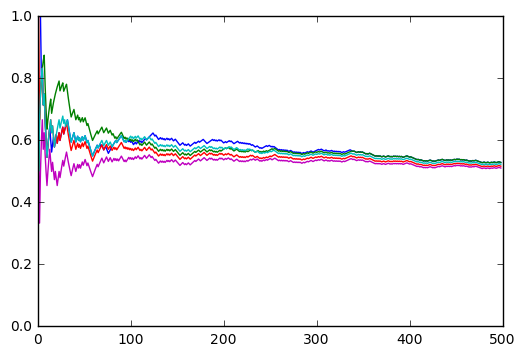

adjclose plot


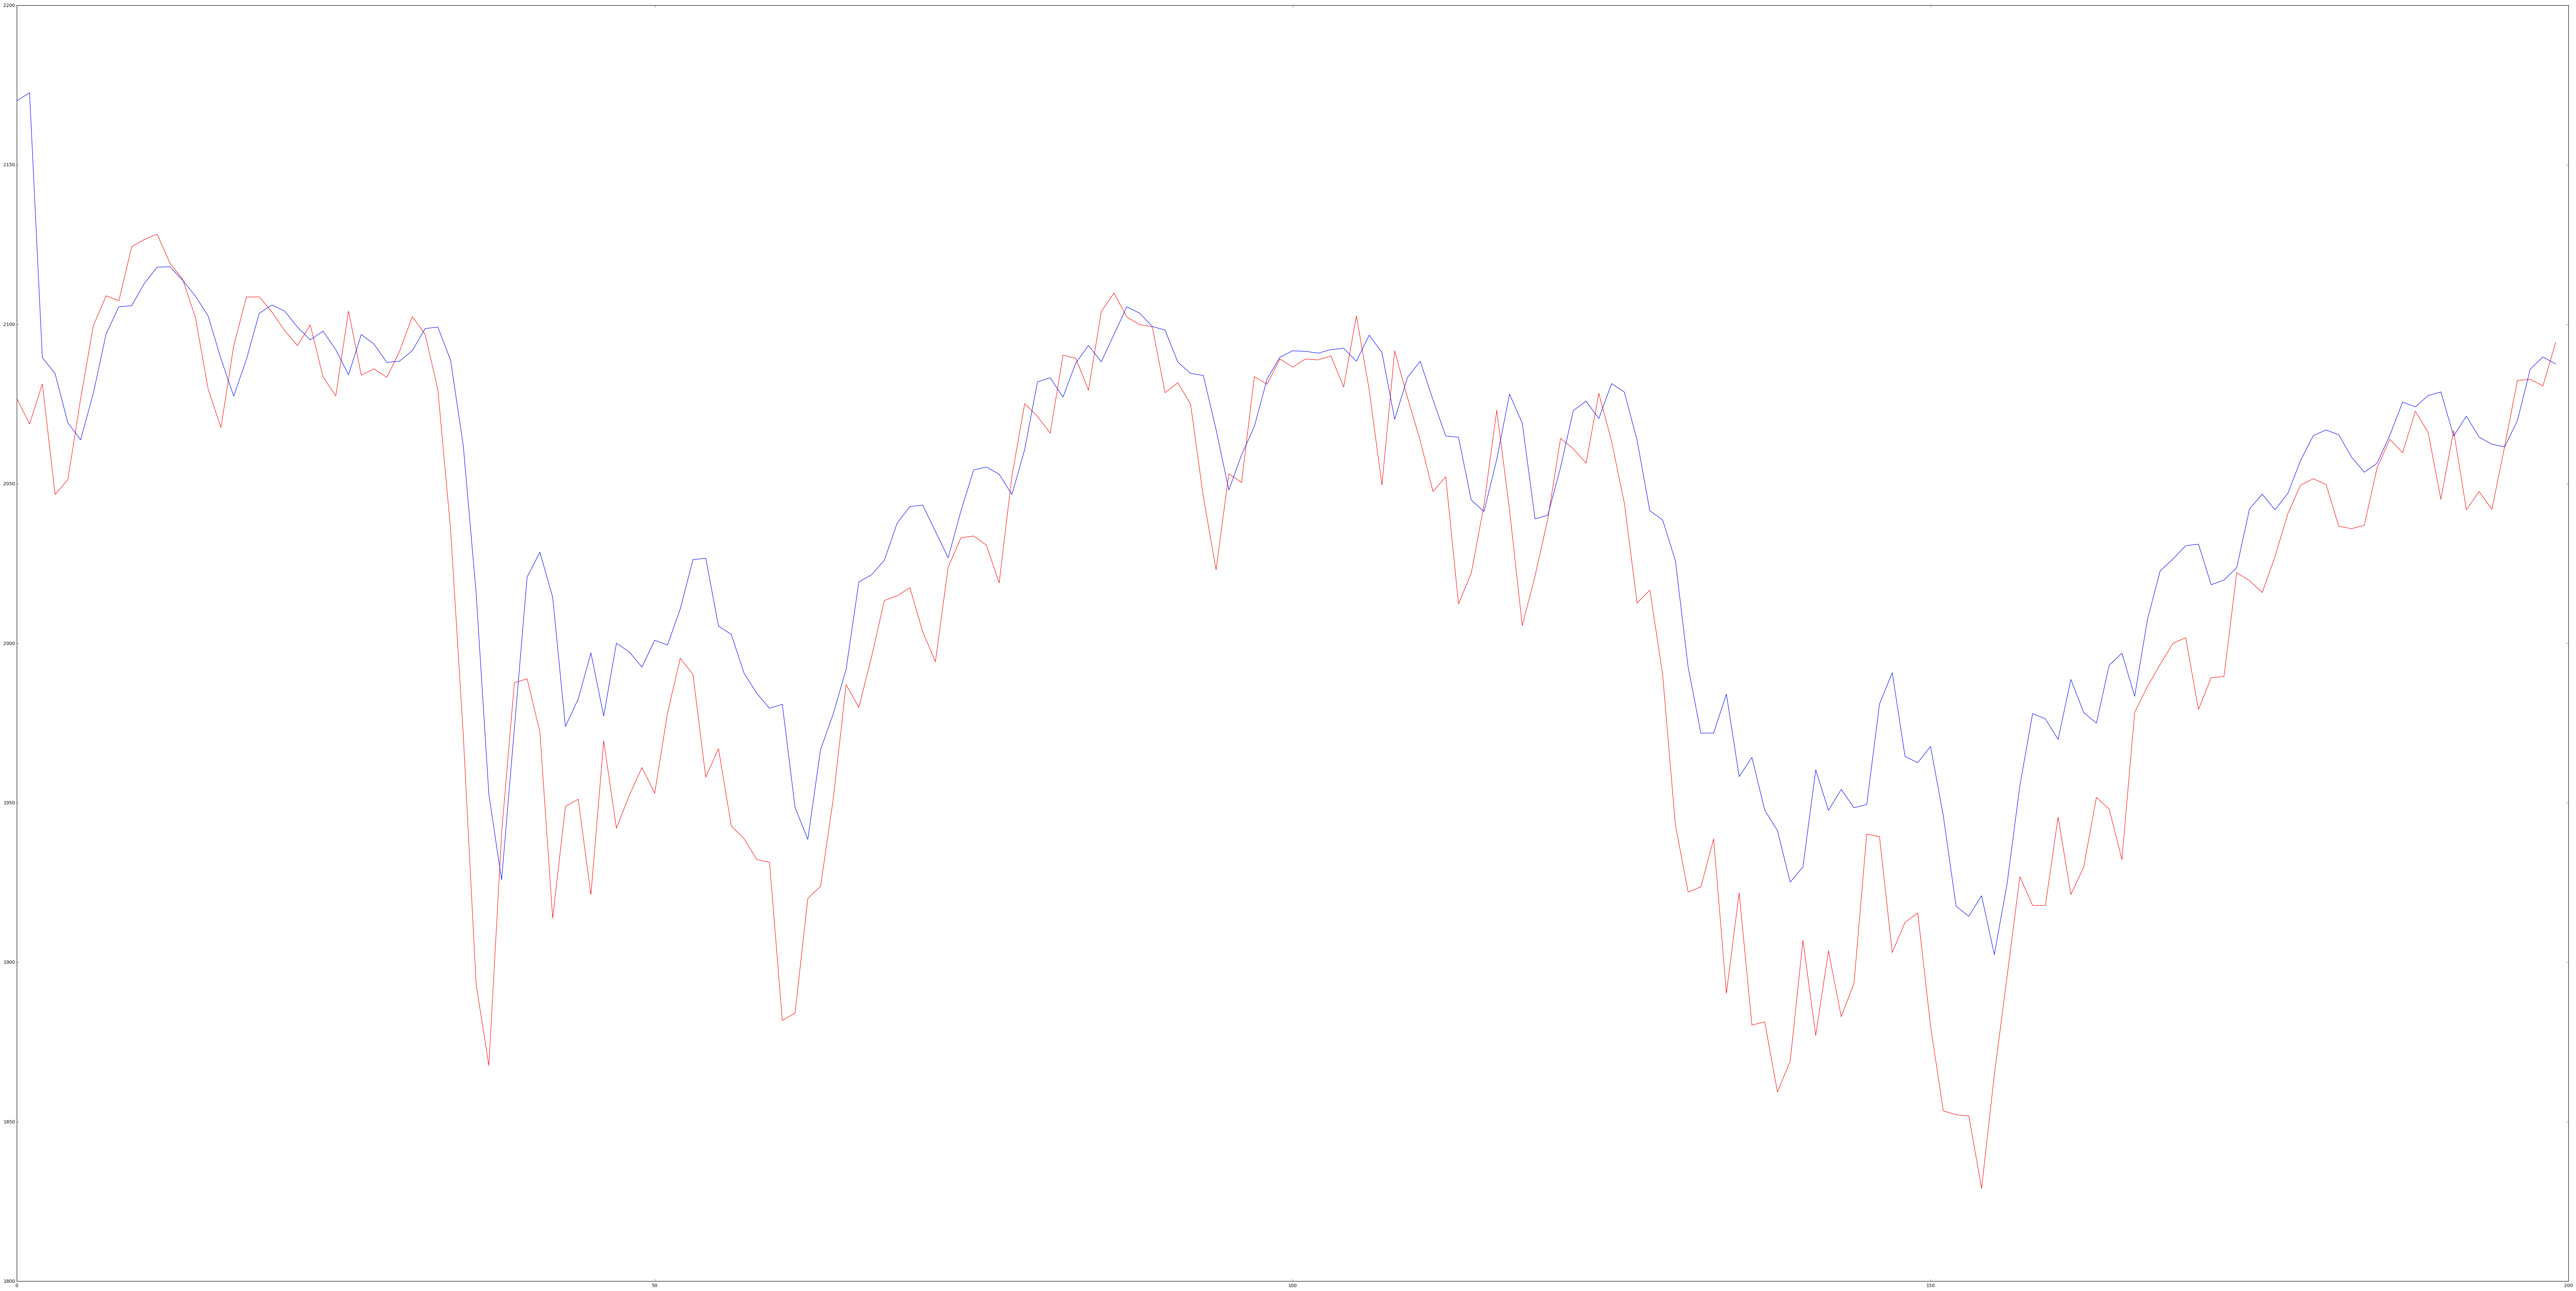

mean of train_RMSE
160.1415538
std of train_RMSE
24.4571678464
mean of test_RMSE
68.5942041291
std of test_RMSE
8.71154236912
mean of test_r2Score
0.783976687511
std of test_r2Score
0.0558560378931
mean of accuracy_all
0.561834063884
std of accuracy_all
0.0196655650956
mean of accuracy_30
0.651612903226
std of accuracy_30
0.0718421208107


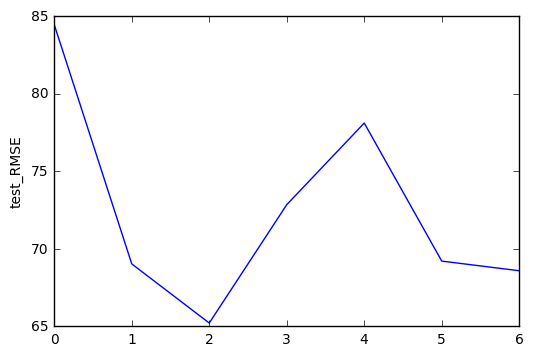

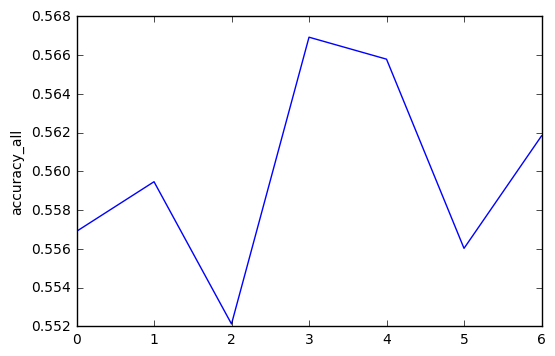

time cost
23241.85235786438


In [47]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


import time
start = time.time()

test_RMSE_all=[]
accuracy_all_all=[]

combinations=[[Open,High,Low,Close,Adjclose,Vloume],[Open,High,Low,Adjclose,Vloume],[Open,High,Low,Close,Vloume],
              [Open,High,Low,Close],[Open,High,Low],[High,Low,Close],[Open,Close]]

for combo in combinations:
    train_RMSE=[]
    test_RMSE=[]
    test_r2Score=[]
    accuracy_all=[]
    accuracy_30=[]
    for i in range(repeats):
        trainX,trainY,testX,testY,scaler_dataset,scaler_target=preparedata(combo)
        # create and fit the LSTM network
        model = Sequential()
        model.add(LSTM(4, batch_input_shape=(1, 1, trainX.shape[2]), stateful=True))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        for i in range(100):
            model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=0, shuffle=False)
            model.reset_states()


        # make predictions
        trainPredict = model.predict(trainX, batch_size=1)
        model.reset_states()
        testPredict = model.predict(testX, batch_size=1)
        # invert predictions
        trainPredict =  scaler_target.inverse_transform(trainPredict)
        trainY =  scaler_target.inverse_transform(trainY)
        testPredict =  scaler_target.inverse_transform(testPredict)
        testY =  scaler_target.inverse_transform(testY)
        # calculate root mean squared error and R2 score
        train_RMSE.append(math.sqrt(mean_squared_error(trainY, trainPredict)))

        test_RMSE.append(math.sqrt(mean_squared_error(testY, testPredict)))


        test_r2Score.append(r2_score(testY, testPredict))



        #transfer to classification probelm
        test_true=testY[:]
        test_pred=testPredict[:]

        test_true_clssfi=[]
        for  i in range(1,len(test_true)):
            if test_true[i]>test_true[i-1]:
                test_true_clssfi.append(1)
            else:
                test_true_clssfi.append(0)

        test_pred_clssfi=[]
        for  i in range(1,len(test_pred)):
            if test_pred[i]>test_true[i-1]:
                test_pred_clssfi.append(1)
            else:
                test_pred_clssfi.append(0)

        accuracy=[]
        for i in range(1,len(test_pred_clssfi)+1):
            accuracy.append(accuracy_score(test_true_clssfi[0:i],test_pred_clssfi[0:i]))
        plt.plot(accuracy)
        accuracy_all.append(np.mean(accuracy))
        accuracy_30.append(np.mean(accuracy[30]))

    print('accuracy plot')    
    plt.show()

    print('adjclose plot')  
    test_true=testY[:200]
    test_pred=testPredict[:200]

    fig, ax = plt.subplots(figsize=(100, 50))
    plt.plot(test_true,color='red')
    plt.plot(test_pred,color='blue')
    plt.show()

    print('mean of train_RMSE')
    print(np.mean(train_RMSE))

    print('std of train_RMSE')
    print(np.std(train_RMSE))

    print('mean of test_RMSE')
    print(np.mean(test_RMSE))

    print('std of test_RMSE')
    print(np.std(test_RMSE))

    print('mean of test_r2Score')
    print(np.mean(test_r2Score))

    print('std of test_r2Score')
    print(np.std(test_r2Score))

    print('mean of accuracy_all')
    print(np.mean(accuracy_all))

    print('std of accuracy_all')
    print(np.std(accuracy_all))

    print('mean of accuracy_30')
    print(np.mean(accuracy_30))

    print('std of accuracy_30')
    print(np.std(accuracy_30))

    test_RMSE_all.append(np.mean(test_RMSE))
    accuracy_all_all.append(np.mean(accuracy_all))
  

plt.plot(test_RMSE_all)
plt.ylabel('test_RMSE')
plt.show()

plt.plot(accuracy_all_all)
plt.ylabel('accuracy_all')
plt.show()


print('time cost')
print( time.time() - start)  

accuracy plot


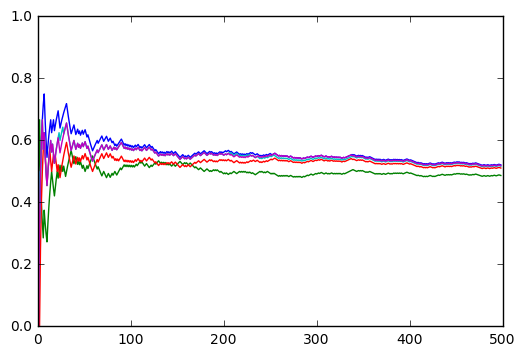

adjclose plot


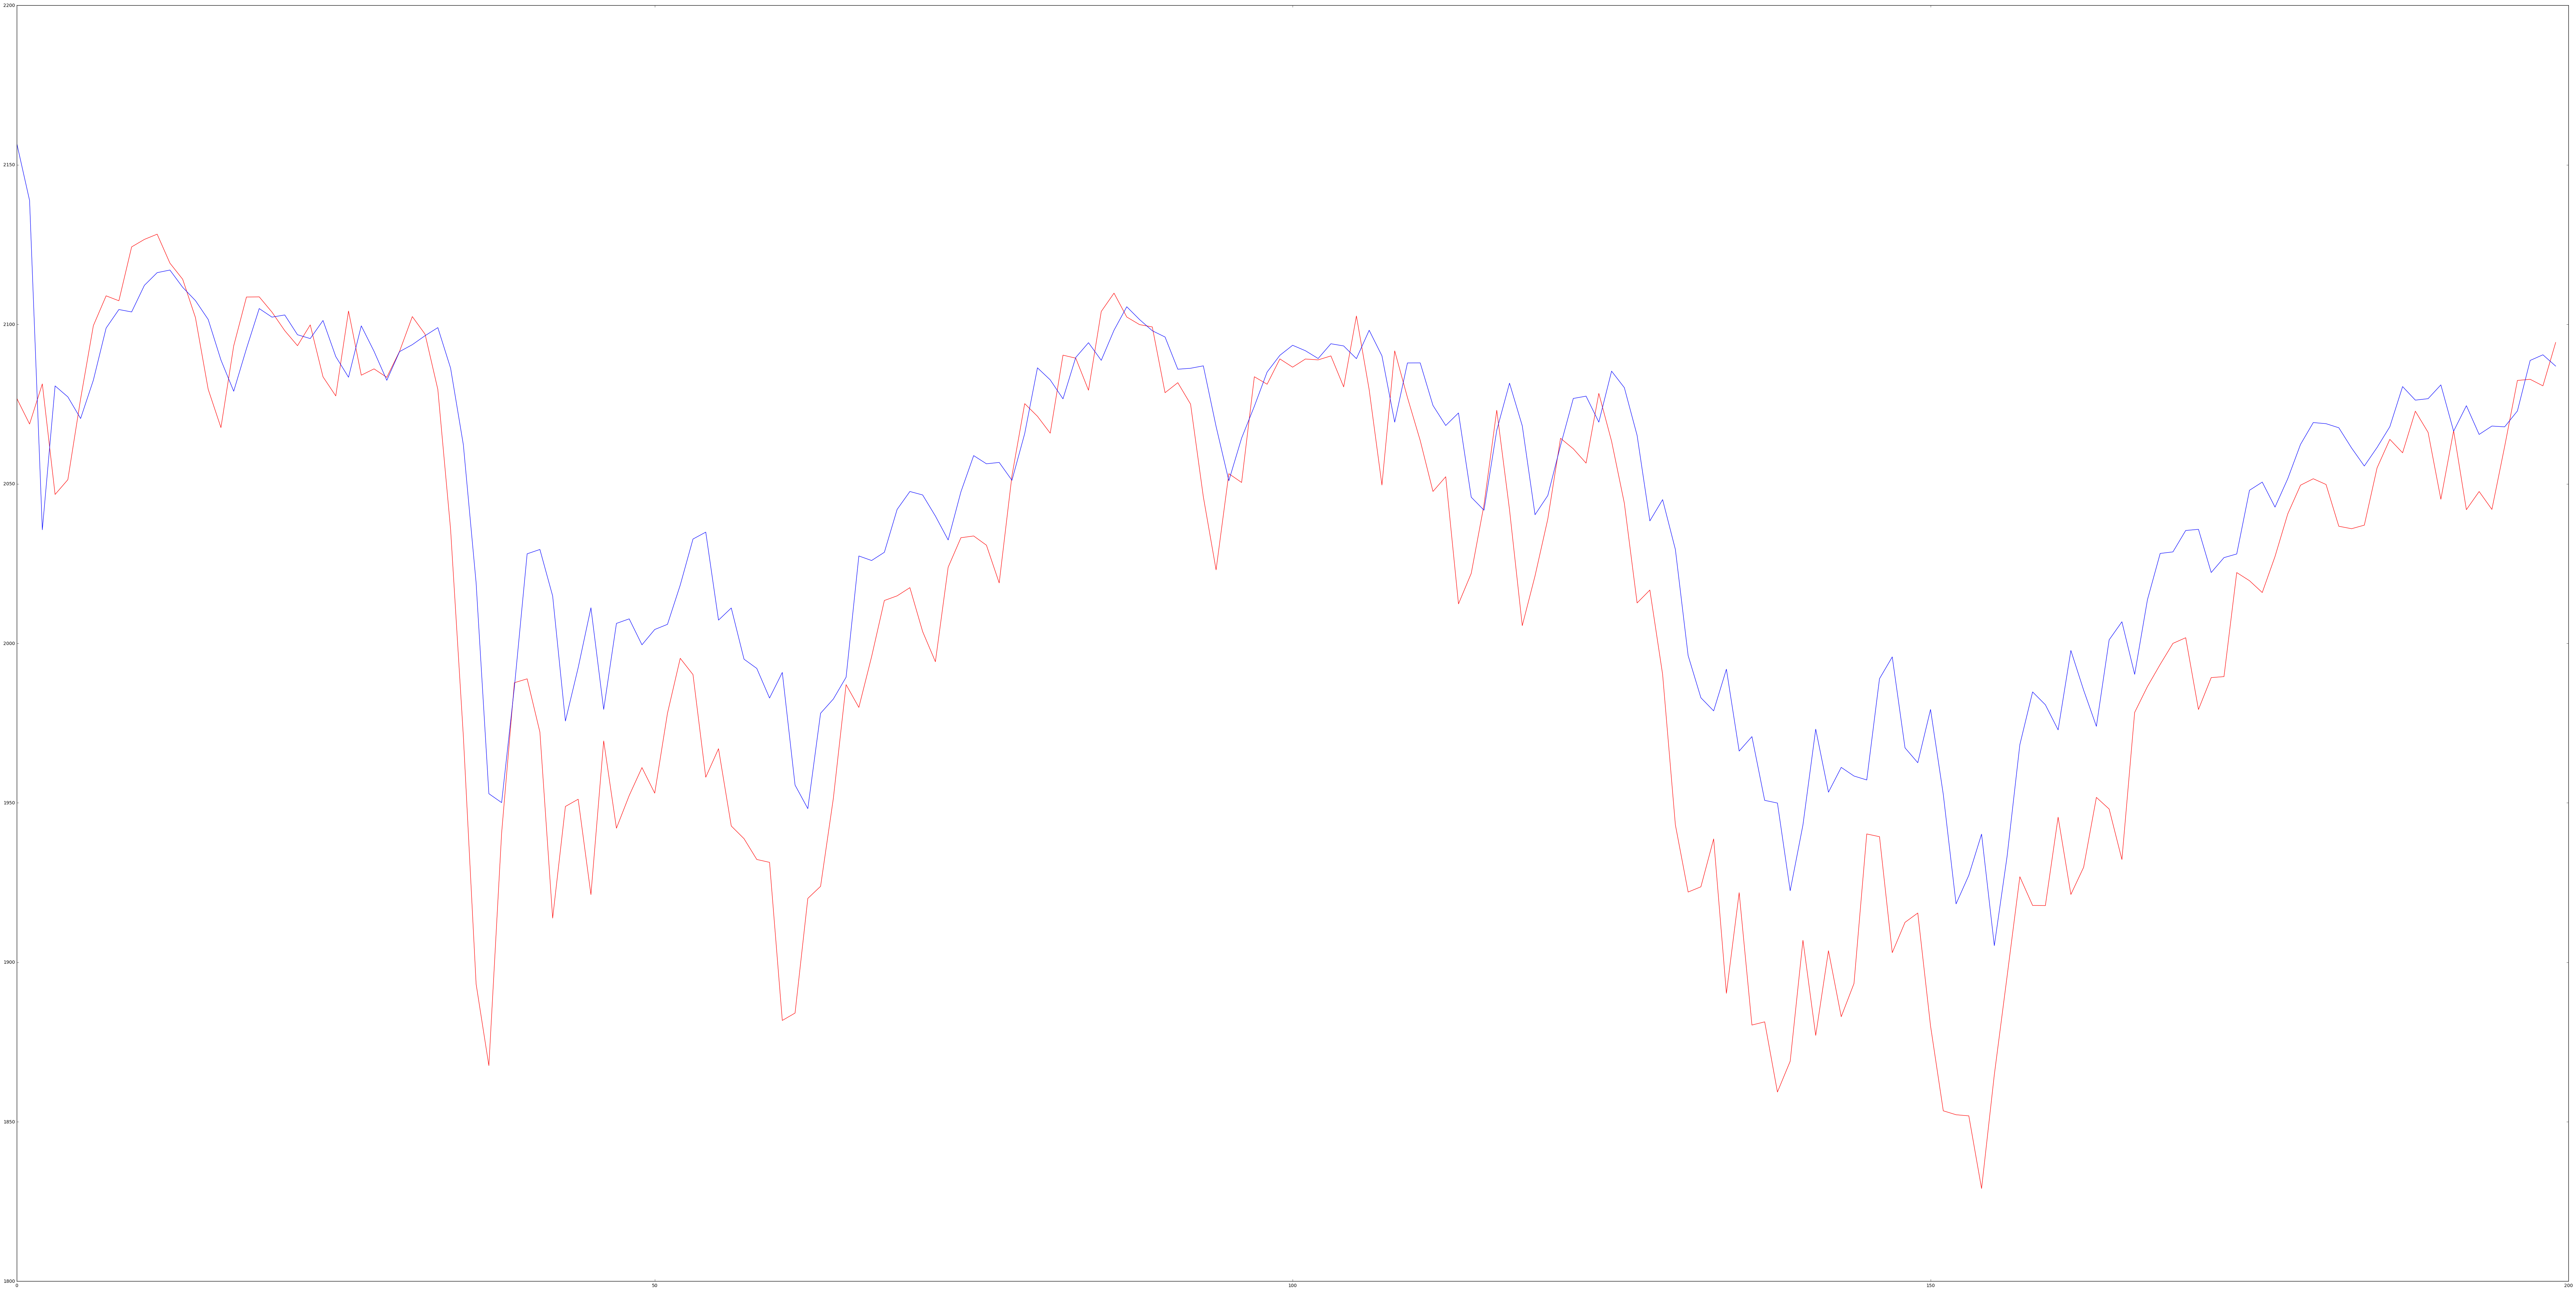

mean of train_RMSE
159.294008673
std of train_RMSE
22.9482104605
mean of test_RMSE
99.7214110113
std of test_RMSE
86.012024081
mean of test_r2Score
0.216413925172
std of test_r2Score
1.65476995655
mean of accuracy_all
0.548797980494
std of accuracy_all
0.0246614294317
mean of accuracy_30
0.632258064516
std of accuracy_30
0.0766086586261
time cost
4125.558968544006


In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


import time
start = time.time()




for i in range(repeats):
    trainX,trainY,testX,testY,scaler_dataset,scaler_target=preparedata([Open,High,Low,Adjclose])
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(1, 1, trainX.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(100):
        model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=0, shuffle=False)
        model.reset_states()


    # make predictions
    trainPredict = model.predict(trainX, batch_size=1)
    model.reset_states()
    testPredict = model.predict(testX, batch_size=1)
    # invert predictions
    trainPredict =  scaler_target.inverse_transform(trainPredict)
    trainY =  scaler_target.inverse_transform(trainY)
    testPredict =  scaler_target.inverse_transform(testPredict)
    testY =  scaler_target.inverse_transform(testY)
    # calculate root mean squared error and R2 score
    train_RMSE.append(math.sqrt(mean_squared_error(trainY, trainPredict)))

    test_RMSE.append(math.sqrt(mean_squared_error(testY, testPredict)))


    test_r2Score.append(r2_score(testY, testPredict))



    #transfer to classification probelm
    test_true=testY[:]
    test_pred=testPredict[:]

    test_true_clssfi=[]
    for  i in range(1,len(test_true)):
        if test_true[i]>test_true[i-1]:
            test_true_clssfi.append(1)
        else:
            test_true_clssfi.append(0)

    test_pred_clssfi=[]
    for  i in range(1,len(test_pred)):
        if test_pred[i]>test_true[i-1]:
            test_pred_clssfi.append(1)
        else:
            test_pred_clssfi.append(0)

    accuracy=[]
    for i in range(1,len(test_pred_clssfi)+1):
        accuracy.append(accuracy_score(test_true_clssfi[0:i],test_pred_clssfi[0:i]))
    plt.plot(accuracy)
    accuracy_all.append(np.mean(accuracy))
    accuracy_30.append(np.mean(accuracy[30]))

print('accuracy plot')    
plt.show()

print('adjclose plot')  
test_true=testY[:200]
test_pred=testPredict[:200]

fig, ax = plt.subplots(figsize=(100, 50))
plt.plot(test_true,color='red')
plt.plot(test_pred,color='blue')
plt.show()

print('mean of train_RMSE')
print(np.mean(train_RMSE))

print('std of train_RMSE')
print(np.std(train_RMSE))

print('mean of test_RMSE')
print(np.mean(test_RMSE))

print('std of test_RMSE')
print(np.std(test_RMSE))

print('mean of test_r2Score')
print(np.mean(test_r2Score))

print('std of test_r2Score')
print(np.std(test_r2Score))

print('mean of accuracy_all')
print(np.mean(accuracy_all))

print('std of accuracy_all')
print(np.std(accuracy_all))

print('mean of accuracy_30')
print(np.mean(accuracy_30))

print('std of accuracy_30')
print(np.std(accuracy_30))

test_RMSE_all.append(np.mean(test_RMSE))
accuracy_all_all.append(np.mean(accuracy_all))
  



print('time cost')
print( time.time() - start)  

accuracy plot


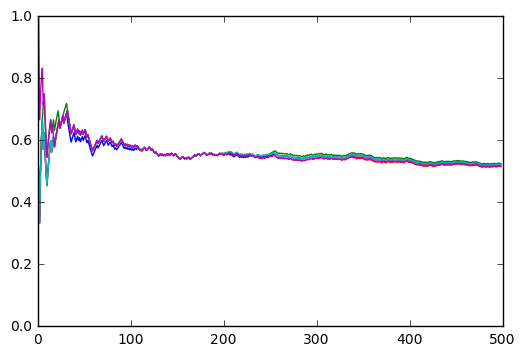

adjclose plot


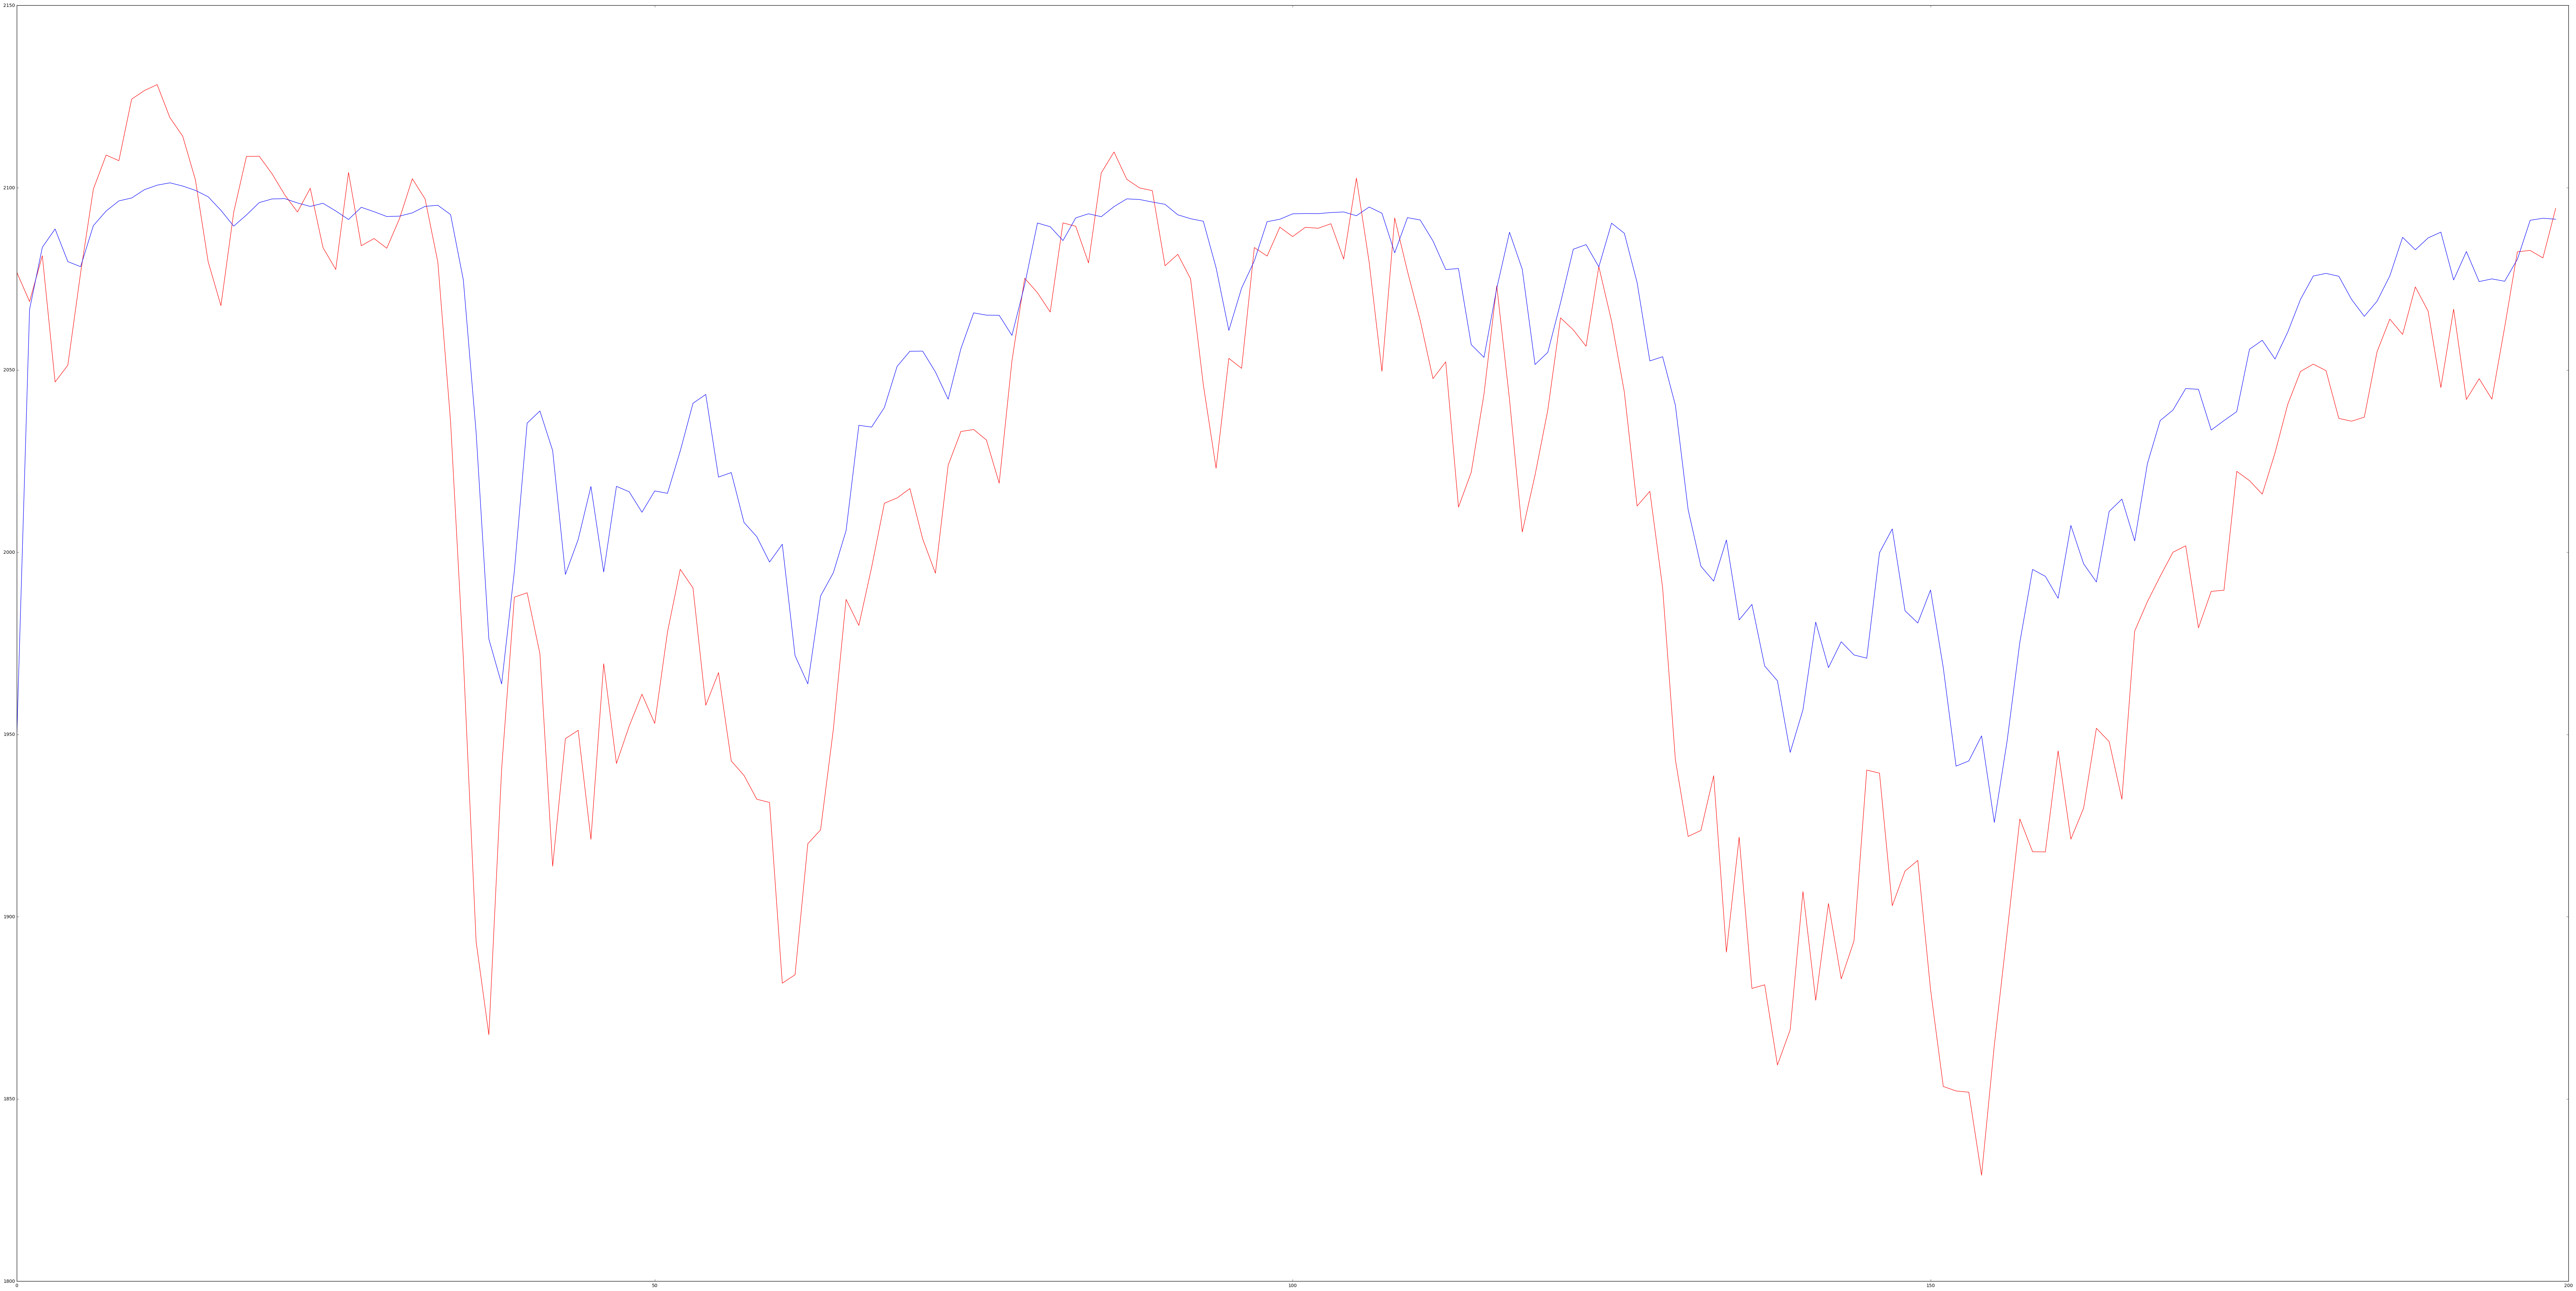

mean of train_RMSE
156.863362318
std of train_RMSE
19.2816302572
mean of test_RMSE
101.254626831
std of test_RMSE
71.034680875
mean of test_r2Score
0.308768461397
std of test_r2Score
1.36078734562
mean of accuracy_all
0.551155764525
std of accuracy_all
0.0205196937828
mean of accuracy_30
0.649462365591
std of accuracy_30
0.0675282514757
time cost
3984.522901535034


In [49]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


import time
start = time.time()




for i in range(repeats):
    trainX,trainY,testX,testY,scaler_dataset,scaler_target=preparedata([Open,High,Low,Close,Adjclose])
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(1, 1, trainX.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(100):
        model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=0, shuffle=False)
        model.reset_states()


    # make predictions
    trainPredict = model.predict(trainX, batch_size=1)
    model.reset_states()
    testPredict = model.predict(testX, batch_size=1)
    # invert predictions
    trainPredict =  scaler_target.inverse_transform(trainPredict)
    trainY =  scaler_target.inverse_transform(trainY)
    testPredict =  scaler_target.inverse_transform(testPredict)
    testY =  scaler_target.inverse_transform(testY)
    # calculate root mean squared error and R2 score
    train_RMSE.append(math.sqrt(mean_squared_error(trainY, trainPredict)))

    test_RMSE.append(math.sqrt(mean_squared_error(testY, testPredict)))


    test_r2Score.append(r2_score(testY, testPredict))



    #transfer to classification probelm
    test_true=testY[:]
    test_pred=testPredict[:]

    test_true_clssfi=[]
    for  i in range(1,len(test_true)):
        if test_true[i]>test_true[i-1]:
            test_true_clssfi.append(1)
        else:
            test_true_clssfi.append(0)

    test_pred_clssfi=[]
    for  i in range(1,len(test_pred)):
        if test_pred[i]>test_true[i-1]:
            test_pred_clssfi.append(1)
        else:
            test_pred_clssfi.append(0)

    accuracy=[]
    for i in range(1,len(test_pred_clssfi)+1):
        accuracy.append(accuracy_score(test_true_clssfi[0:i],test_pred_clssfi[0:i]))
    plt.plot(accuracy)
    accuracy_all.append(np.mean(accuracy))
    accuracy_30.append(np.mean(accuracy[30]))

print('accuracy plot')    
plt.show()

print('adjclose plot')  
test_true=testY[:200]
test_pred=testPredict[:200]

fig, ax = plt.subplots(figsize=(100, 50))
plt.plot(test_true,color='red')
plt.plot(test_pred,color='blue')
plt.show()

print('mean of train_RMSE')
print(np.mean(train_RMSE))

print('std of train_RMSE')
print(np.std(train_RMSE))

print('mean of test_RMSE')
print(np.mean(test_RMSE))

print('std of test_RMSE')
print(np.std(test_RMSE))

print('mean of test_r2Score')
print(np.mean(test_r2Score))

print('std of test_r2Score')
print(np.std(test_r2Score))

print('mean of accuracy_all')
print(np.mean(accuracy_all))

print('std of accuracy_all')
print(np.std(accuracy_all))

print('mean of accuracy_30')
print(np.mean(accuracy_30))

print('std of accuracy_30')
print(np.std(accuracy_30))

test_RMSE_all.append(np.mean(test_RMSE))
accuracy_all_all.append(np.mean(accuracy_all))
  



print('time cost')
print( time.time() - start)  